# Exploratory Data Analysis of Air Quality Dataset
Dataset Link: [Click here](https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india)


## Work done by me:
- Reduced the hourly dataset to a daily basis.
- Reduced the hourly dataset to a monthly basis.
- Derived insights and patterns for overall air quality in India.
- Derived insights and patterns for air quality in Delhi and Bengaluru.

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load the csv file and display first five rows of the data.
df = pd.read_csv('D:\\Sample\\air_quality_data.csv\\air_quality_data.csv')
df.head()

City             Datetime  PM2.5  PM10    NO    NO2    NOx  NH3    CO  \
0  Ahmedabad  2015-01-01 01:00:00    NaN   NaN  1.00  40.01  36.37  NaN  1.00   
1  Ahmedabad  2015-01-01 02:00:00    NaN   NaN  0.02  27.75  19.73  NaN  0.02   
2  Ahmedabad  2015-01-01 03:00:00    NaN   NaN  0.08  19.32  11.08  NaN  0.08   
3  Ahmedabad  2015-01-01 04:00:00    NaN   NaN  0.30  16.45   9.20  NaN  0.30   
4  Ahmedabad  2015-01-01 05:00:00    NaN   NaN  0.12  14.90   7.85  NaN  0.12   

      SO2      O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  122.07     NaN      0.0      0.0     0.0  NaN        NaN  
1   85.90     NaN      0.0      0.0     0.0  NaN        NaN  
2   52.83     NaN      0.0      0.0     0.0  NaN        NaN  
3   39.53  153.58      0.0      0.0     0.0  NaN        NaN  
4   32.63     NaN      0.0      0.0     0.0  NaN        NaN

In [3]:
#Convert the Datetime columns into a Pandas Datetime Series.
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [4]:
#Create another DataFrame where Datetime is the index.
datedf = df.set_index('Datetime')

In [5]:
#One of the outliers in the dataset
df.loc[25130]

City                    Ahmedabad
Datetime      2017-11-13 03:00:00
PM2.5                       151.7
PM10                          NaN
NO                          11.07
NO2                        120.04
NOx                         66.82
NH3                           NaN
CO                          11.07
SO2                        146.49
O3                          13.19
Benzene                       0.0
Toluene                       0.0
Xylene                        0.0
AQI                        3133.0
AQI_Bucket                 Severe
Name: 25130, dtype: object

In [6]:
datedf.index

DatetimeIndex(['2015-01-01 01:00:00', '2015-01-01 02:00:00',
               '2015-01-01 03:00:00', '2015-01-01 04:00:00',
               '2015-01-01 05:00:00', '2015-01-01 06:00:00',
               '2015-01-01 07:00:00', '2015-01-01 08:00:00',
               '2015-01-01 09:00:00', '2015-01-01 10:00:00',
               ...
               '2020-06-22 00:00:00', '2020-06-23 00:00:00',
               '2020-06-24 00:00:00', '2020-06-25 00:00:00',
               '2020-06-26 00:00:00', '2020-06-27 00:00:00',
               '2020-06-28 00:00:00', '2020-06-29 00:00:00',
               '2020-06-30 00:00:00', '2020-07-01 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=737406, freq=None)

In [7]:
datedf.head()

City  PM2.5  PM10    NO    NO2    NOx  NH3    CO  \
Datetime                                                                     
2015-01-01 01:00:00  Ahmedabad    NaN   NaN  1.00  40.01  36.37  NaN  1.00   
2015-01-01 02:00:00  Ahmedabad    NaN   NaN  0.02  27.75  19.73  NaN  0.02   
2015-01-01 03:00:00  Ahmedabad    NaN   NaN  0.08  19.32  11.08  NaN  0.08   
2015-01-01 04:00:00  Ahmedabad    NaN   NaN  0.30  16.45   9.20  NaN  0.30   
2015-01-01 05:00:00  Ahmedabad    NaN   NaN  0.12  14.90   7.85  NaN  0.12   

                        SO2      O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
Datetime                                                                       
2015-01-01 01:00:00  122.07     NaN      0.0      0.0     0.0  NaN        NaN  
2015-01-01 02:00:00   85.90     NaN      0.0      0.0     0.0  NaN        NaN  
2015-01-01 03:00:00   52.83     NaN      0.0      0.0     0.0  NaN        NaN  
2015-01-01 04:00:00   39.53  153.58      0.0      0.0     0.0  NaN        NaN  
2015-01-01 05:00:00   32.63     NaN      0.0      0.0     0.0  NaN        NaN

In [8]:
#Create a groupby object based on cities.
cityGroup = datedf.groupby('City')

In [9]:
#Retrieving the rows of City Ahmedabad
cityGroup.get_group('Ahmedabad')

City  PM2.5    PM10    NO    NO2    NOx  NH3    CO  \
Datetime                                                                       
2015-01-01 01:00:00  Ahmedabad    NaN     NaN  1.00  40.01  36.37  NaN  1.00   
2015-01-01 02:00:00  Ahmedabad    NaN     NaN  0.02  27.75  19.73  NaN  0.02   
2015-01-01 03:00:00  Ahmedabad    NaN     NaN  0.08  19.32  11.08  NaN  0.08   
2015-01-01 04:00:00  Ahmedabad    NaN     NaN  0.30  16.45   9.20  NaN  0.30   
2015-01-01 05:00:00  Ahmedabad    NaN     NaN  0.12  14.90   7.85  NaN  0.12   
...                        ...    ...     ...   ...    ...    ...  ...   ...   
2020-06-27 00:00:00  Ahmedabad  62.12  118.67  9.18  56.35  19.86  NaN  0.49   
2020-06-28 00:00:00  Ahmedabad  31.57     NaN  6.37  23.99  16.40  NaN  0.52   
2020-06-29 00:00:00  Ahmedabad  29.75  127.98  9.06  25.15  18.92  NaN  0.67   
2020-06-30 00:00:00  Ahmedabad  40.02  121.10  7.09  58.92  33.41  NaN  0.73   
2020-07-01 00:00:00  Ahmedabad  37.63     NaN  4.42  35.04  20.17  NaN  0.28   

                        SO2      O3  Benzene  Toluene  Xylene    AQI  \
Datetime                                                               
2015-01-01 01:00:00  122.07     NaN     0.00     0.00    0.00    NaN   
2015-01-01 02:00:00   85.90     NaN     0.00     0.00    0.00    NaN   
2015-01-01 03:00:00   52.83     NaN     0.00     0.00    0.00    NaN   
2015-01-01 04:00:00   39.53  153.58     0.00     0.00    0.00    NaN   
2015-01-01 05:00:00   32.63     NaN     0.00     0.00    0.00    NaN   
...                     ...     ...      ...      ...     ...    ...   
2020-06-27 00:00:00   12.44   68.05     1.32    37.76    1.62   92.0   
2020-06-28 00:00:00   11.01   26.34     1.37    49.58    1.34   82.0   
2020-06-29 00:00:00   12.10   34.99     1.39    60.21    0.79   74.0   
2020-06-30 00:00:00   16.39   41.64     1.21    44.10    1.35   98.0   
2020-07-01 00:00:00   14.40    9.69     1.73    47.05    1.87  119.0   

                       AQI_Bucket  
Datetime                           
2015-01-01 01:00:00           NaN  
2015-01-01 02:00:00           NaN  
2015-01-01 03:00:00           NaN  
2015-01-01 04:00:00           NaN  
2015-01-01 05:00:00           NaN  
...                           ...  
2020-06-27 00:00:00  Satisfactory  
2020-06-28 00:00:00  Satisfactory  
2020-06-29 00:00:00  Satisfactory  
2020-06-30 00:00:00  Satisfactory  
2020-07-01 00:00:00      Moderate  

[50201 rows x 15 columns]

## DataFrame Conversion
The main dataset contains approximately 700,000 entries, making it challenging to derive insights. Therefore, I converted this dataset into four types:

- Interval/Day DataFrame (120,000 entries)
- Day-based DataFrame (29,000 entries)
- Month-based DataFrame (4,200 entries)

Additionally, by performing this conversion, many of the missing values will be filled with mean and median values. Since I am not implementing any machine learning models, I will not engage in intensive data cleaning; instead, I will handle the missing values during the plotting process.

In [10]:
#Conversion to 4 Interval/Day DataFrame
reslist = []
for city, group in cityGroup:
    res = group.resample('6H').agg({
        'PM2.5': 'mean',
        'PM10': 'mean',
        'NO': 'mean',
        'NOx': 'mean',
        'NO2': 'mean',
        'NH3': 'mean',
        'CO': 'mean',
        'SO2': 'mean',
        'O3': 'mean',
        'Benzene': 'mean',
        'Toluene': 'mean',
        'Xylene': 'mean',
        'AQI': 'mean',
        'AQI_Bucket': lambda x: x.mode()[0] if not x.mode().empty else np.nan
    })
    res['City'] = city
    reslist.append(res)
    
finalres = pd.concat(reslist)

In [11]:
finalres['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [12]:
finalres.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118046 entries, 2015-01-01 00:00:00 to 2020-07-01 00:00:00
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   PM2.5       97677 non-null   float64
 1   PM10        71901 non-null   float64
 2   NO          101953 non-null  float64
 3   NOx         99990 non-null   float64
 4   NO2         101918 non-null  float64
 5   NH3         75324 non-null   float64
 6   CO          107801 non-null  float64
 7   SO2         100693 non-null  float64
 8   O3          99998 non-null   float64
 9   Benzene     93768 non-null   float64
 10  Toluene     84227 non-null   float64
 11  Xylene      44182 non-null   float64
 12  AQI         97769 non-null   float64
 13  AQI_Bucket  97769 non-null   object 
 14  City        118046 non-null  object 
dtypes: float64(13), object(2)
memory usage: 14.4+ MB


In [13]:
#Conversion to Day-Based DataFrame.
reslist1 = []
for city, group in cityGroup:
    res = group.resample('D').agg({
        'PM2.5': 'mean',
        'PM10': 'mean',
        'NO': 'mean',
        'NOx': 'mean',
        'NO2': 'mean',
        'NH3': 'mean',
        'CO': 'mean',
        'SO2': 'mean',
        'O3': 'mean',
        'Benzene': 'mean',
        'Toluene': 'mean',
        'Xylene': 'mean',
        'AQI': 'mean',
        'AQI_Bucket': lambda x: x.mode()[0] if not x.mode().empty else np.nan
    })
    res['City'] = city
    reslist1.append(res)
    
finalres1 = pd.concat(reslist1)

In [14]:
finalres1['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [15]:
finalres1.head()

PM2.5  PM10         NO        NOx        NO2  NH3         CO  \
Datetime                                                                   
2015-01-01    NaN   NaN   0.924583  17.145833  18.216667  NaN   0.924583   
2015-01-02    NaN   NaN   0.967917  16.462083  15.692000  NaN   0.967917   
2015-01-03    NaN   NaN  17.403125  29.697200  19.303200  NaN  17.403125   
2015-01-04    NaN   NaN   1.696316  17.974000  18.476400  NaN   1.696316   
2015-01-05    NaN   NaN  22.100526  37.757200  21.419600  NaN  22.100526   

                  SO2        O3   Benzene    Toluene   Xylene  AQI AQI_Bucket  \
Datetime                                                                        
2015-01-01  27.644583  133.3600  0.000000   0.024167  0.00000  NaN        NaN   
2015-01-02  24.552800   34.0600  3.680833   5.503333  3.77125  NaN        NaN   
2015-01-03  29.066000   30.6956  6.796400  16.404400  2.24800  NaN        NaN   
2015-01-04  18.594400   36.0772  4.428800  10.136000  0.99760  NaN        NaN   
2015-01-05  39.334000   39.3092  7.011200  18.891600  2.77520  NaN        NaN   

                 City  
Datetime               
2015-01-01  Ahmedabad  
2015-01-02  Ahmedabad  
2015-01-03  Ahmedabad  
2015-01-04  Ahmedabad  
2015-01-05  Ahmedabad

In [16]:
finalres1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29531 entries, 2015-01-01 to 2020-07-01
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PM2.5       24933 non-null  float64
 1   PM10        18391 non-null  float64
 2   NO          25949 non-null  float64
 3   NOx         25346 non-null  float64
 4   NO2         25946 non-null  float64
 5   NH3         19203 non-null  float64
 6   CO          27472 non-null  float64
 7   SO2         25677 non-null  float64
 8   O3          25509 non-null  float64
 9   Benzene     23908 non-null  float64
 10  Toluene     21490 non-null  float64
 11  Xylene      11422 non-null  float64
 12  AQI         24850 non-null  float64
 13  AQI_Bucket  24850 non-null  object 
 14  City        29531 non-null  object 
dtypes: float64(13), object(2)
memory usage: 3.6+ MB


In [17]:
#Coversion to Week-Based DataFrame.
reslist2 = []
for city, group in cityGroup:
    res = group.resample('W').agg({
        'PM2.5': 'mean',
        'PM10': 'mean',
        'NO': 'mean',
        'NOx': 'mean',
        'NO2': 'mean',
        'NH3': 'mean',
        'CO': 'mean',
        'SO2': 'mean',
        'O3': 'mean',
        'Benzene': 'mean',
        'Toluene': 'mean',
        'Xylene': 'mean',
        'AQI': 'mean',
        'AQI_Bucket': lambda x: x.mode()[0] if not x.mode().empty else np.nan
    })
    res['City'] = city
    reslist2.append(res)
    
finalres2 = pd.concat(reslist2)

In [18]:
finalres2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4243 entries, 2015-01-04 to 2020-07-05
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PM2.5       3683 non-null   float64
 1   PM10        2753 non-null   float64
 2   NO          3847 non-null   float64
 3   NOx         3719 non-null   float64
 4   NO2         3847 non-null   float64
 5   NH3         2863 non-null   float64
 6   CO          4060 non-null   float64
 7   SO2         3827 non-null   float64
 8   O3          3812 non-null   float64
 9   Benzene     3559 non-null   float64
 10  Toluene     3191 non-null   float64
 11  Xylene      1722 non-null   float64
 12  AQI         3741 non-null   float64
 13  AQI_Bucket  3741 non-null   object 
 14  City        4243 non-null   object 
dtypes: float64(13), object(2)
memory usage: 530.4+ KB


In [19]:
dayTrend = finalres1[['City', 'PM2.5', 'PM10', 'NO', 'NOx', 'NO2', 'NH3', 'CO', 'SO2', 'O3','Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']]

In [20]:
#Conversion to Month-Based DataFrame.
reslist3 = []
for city, group in cityGroup:
    res = group.resample('M').agg({
        'PM2.5': 'mean',
        'PM10': 'mean',
        'NO': 'mean',
        'NOx': 'mean',
        'NO2': 'mean',
        'NH3': 'mean',
        'CO': 'mean',
        'SO2': 'mean',
        'O3': 'mean',
        'Benzene': 'mean',
        'Toluene': 'mean',
        'Xylene': 'mean',
        'AQI': 'mean',
        'AQI_Bucket': lambda x: x.mode()[0] if not x.mode().empty else np.nan
    })
    res['City'] = city
    reslist3.append(res)
    
monthTrend = pd.concat(reslist3)

In [21]:
monthTrend[monthTrend['City'] == 'Mumbai'].loc['2015-01':'2018-04']

PM2.5       PM10          NO         NOx    NO2  NH3  \
Datetime                                                               
2015-01-31        NaN        NaN         NaN   26.821408    NaN  NaN   
2015-02-28        NaN        NaN         NaN   27.139971    NaN  NaN   
2015-03-31        NaN        NaN         NaN   91.136963    NaN  NaN   
2015-04-30        NaN        NaN         NaN   51.948788    NaN  NaN   
2015-05-31        NaN        NaN         NaN   26.058932    NaN  NaN   
2015-06-30        NaN        NaN         NaN   22.949833    NaN  NaN   
2015-07-31        NaN        NaN         NaN   20.410323    NaN  NaN   
2015-08-31        NaN        NaN         NaN   39.075413    NaN  NaN   
2015-09-30        NaN        NaN         NaN   44.508907    NaN  NaN   
2015-10-31        NaN        NaN         NaN   80.953368    NaN  NaN   
2015-11-30        NaN        NaN         NaN  130.335404    NaN  NaN   
2015-12-31        NaN        NaN         NaN  103.355523    NaN  NaN   
2016-01-31        NaN        NaN         NaN   26.526641    NaN  NaN   
2016-02-29        NaN        NaN         NaN   21.453035    NaN  NaN   
2016-03-31        NaN        NaN         NaN   17.280116    NaN  NaN   
2016-04-30        NaN        NaN         NaN   25.714747    NaN  NaN   
2016-05-31        NaN        NaN         NaN   20.230638    NaN  NaN   
2016-06-30        NaN        NaN         NaN    9.779941    NaN  NaN   
2016-07-31        NaN        NaN         NaN   70.591252    NaN  NaN   
2016-08-31        NaN        NaN         NaN  195.634904    NaN  NaN   
2016-09-30        NaN        NaN         NaN         NaN    NaN  NaN   
2016-10-31        NaN        NaN         NaN         NaN    NaN  NaN   
2016-11-30        NaN        NaN         NaN         NaN    NaN  NaN   
2016-12-31        NaN        NaN         NaN         NaN    NaN  NaN   
2017-01-31        NaN        NaN         NaN         NaN    NaN  NaN   
2017-02-28        NaN        NaN         NaN         NaN    NaN  NaN   
2017-03-31        NaN        NaN         NaN         NaN    NaN  NaN   
2017-04-30        NaN        NaN         NaN         NaN    NaN  NaN   
2017-05-31        NaN        NaN         NaN         NaN    NaN  NaN   
2017-06-30        NaN        NaN         NaN         NaN    NaN  NaN   
2017-07-31        NaN        NaN         NaN         NaN    NaN  NaN   
2017-08-31        NaN        NaN         NaN         NaN    NaN  NaN   
2017-09-30        NaN        NaN         NaN         NaN    NaN  NaN   
2017-10-31        NaN        NaN         NaN         NaN    NaN  NaN   
2017-11-30        NaN        NaN         NaN   24.173474    NaN  NaN   
2017-12-31        NaN        NaN         NaN   71.594542    NaN  NaN   
2018-01-31        NaN        NaN   89.535556   91.811438    NaN  NaN   
2018-02-28        NaN        NaN  143.061600  101.388136   8.94  NaN   
2018-03-31        NaN        NaN   62.847143   71.968155    NaN  NaN   
2018-04-30  25.498333  58.531667   51.261852   67.140645  20.08  NaN   

                  CO     SO2         O3   Benzene   Toluene    Xylene  AQI  \
Datetime                                                                     
2015-01-31  0.000000     NaN        NaN  0.000000  0.000000  0.000000  NaN   
2015-02-28  0.000000     NaN        NaN  0.000000  0.000000  0.000000  NaN   
2015-03-31  0.000000     NaN        NaN  0.000000  0.000000  0.000000  NaN   
2015-04-30  0.000000     NaN        NaN  0.000000  0.000000  0.000000  NaN   
2015-05-31  0.000000     NaN        NaN  0.000000  0.000000  0.000000  NaN   
2015-06-30  0.000000     NaN        NaN  0.000000  0.000000  0.000000  NaN   
2015-07-31  0.000000     NaN        NaN  0.000000  0.000000  0.000000  NaN   
2015-08-31  0.000000     NaN        NaN  0.000000  0.000000  0.000000  NaN   
2015-09-30  0.000000     NaN        NaN  0.000000  0.000000  0.000000  NaN   
2015-10-31  0.000000     NaN        NaN  0.000000  0.000000  0.000000  NaN   
2015-11-30  0.000000     NaN        NaN  0.000000  0.00

## Overall India Analysis

In this section, I plot graphs to analyze the Air Quality Index (AQI) and patterns for major cities in India. The plots presented here are:

1. **Median AQI for Major Cities**: A bar plot illustrating the median AQI for several key cities (median is used instead of mean, as the mean value can be heavily influenced by outliers).
2. **Correlation Matrix for Pollutants**: A Seaborn heatmap representing the correlation between various pollutants across India.
3. **Variation of PM2.5 Pollutant**: Line plots depicting the variation of the PM2.5 pollutant for selected cities.
4. **Relationship Between AQI, PM2.5, and PM10**: Scatter plots demonstrating the relationship between AQI, PM2.5, and PM10.


In [53]:
cityList = list(monthTrend['City'].value_counts().index)
majorCities = cityList[1:11]
print(majorCities)

['Delhi', 'Mumbai', 'Bengaluru', 'Lucknow', 'Hyderabad', 'Chennai', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar']


In [23]:
meanAQI = []
count = 0
for city in monthTrend['City'].value_counts().index:
    count += 1
    meanAQI.append(round(monthTrend[monthTrend['City'] == city]['AQI'].median(), 3))
    if count == 11:
        break
meanAQI = meanAQI[1:]
print(meanAQI)

[258.137, 87.964, 92.872, 216.674, 112.407, 108.777, 232.258, 218.694, 107.13, 106.19]


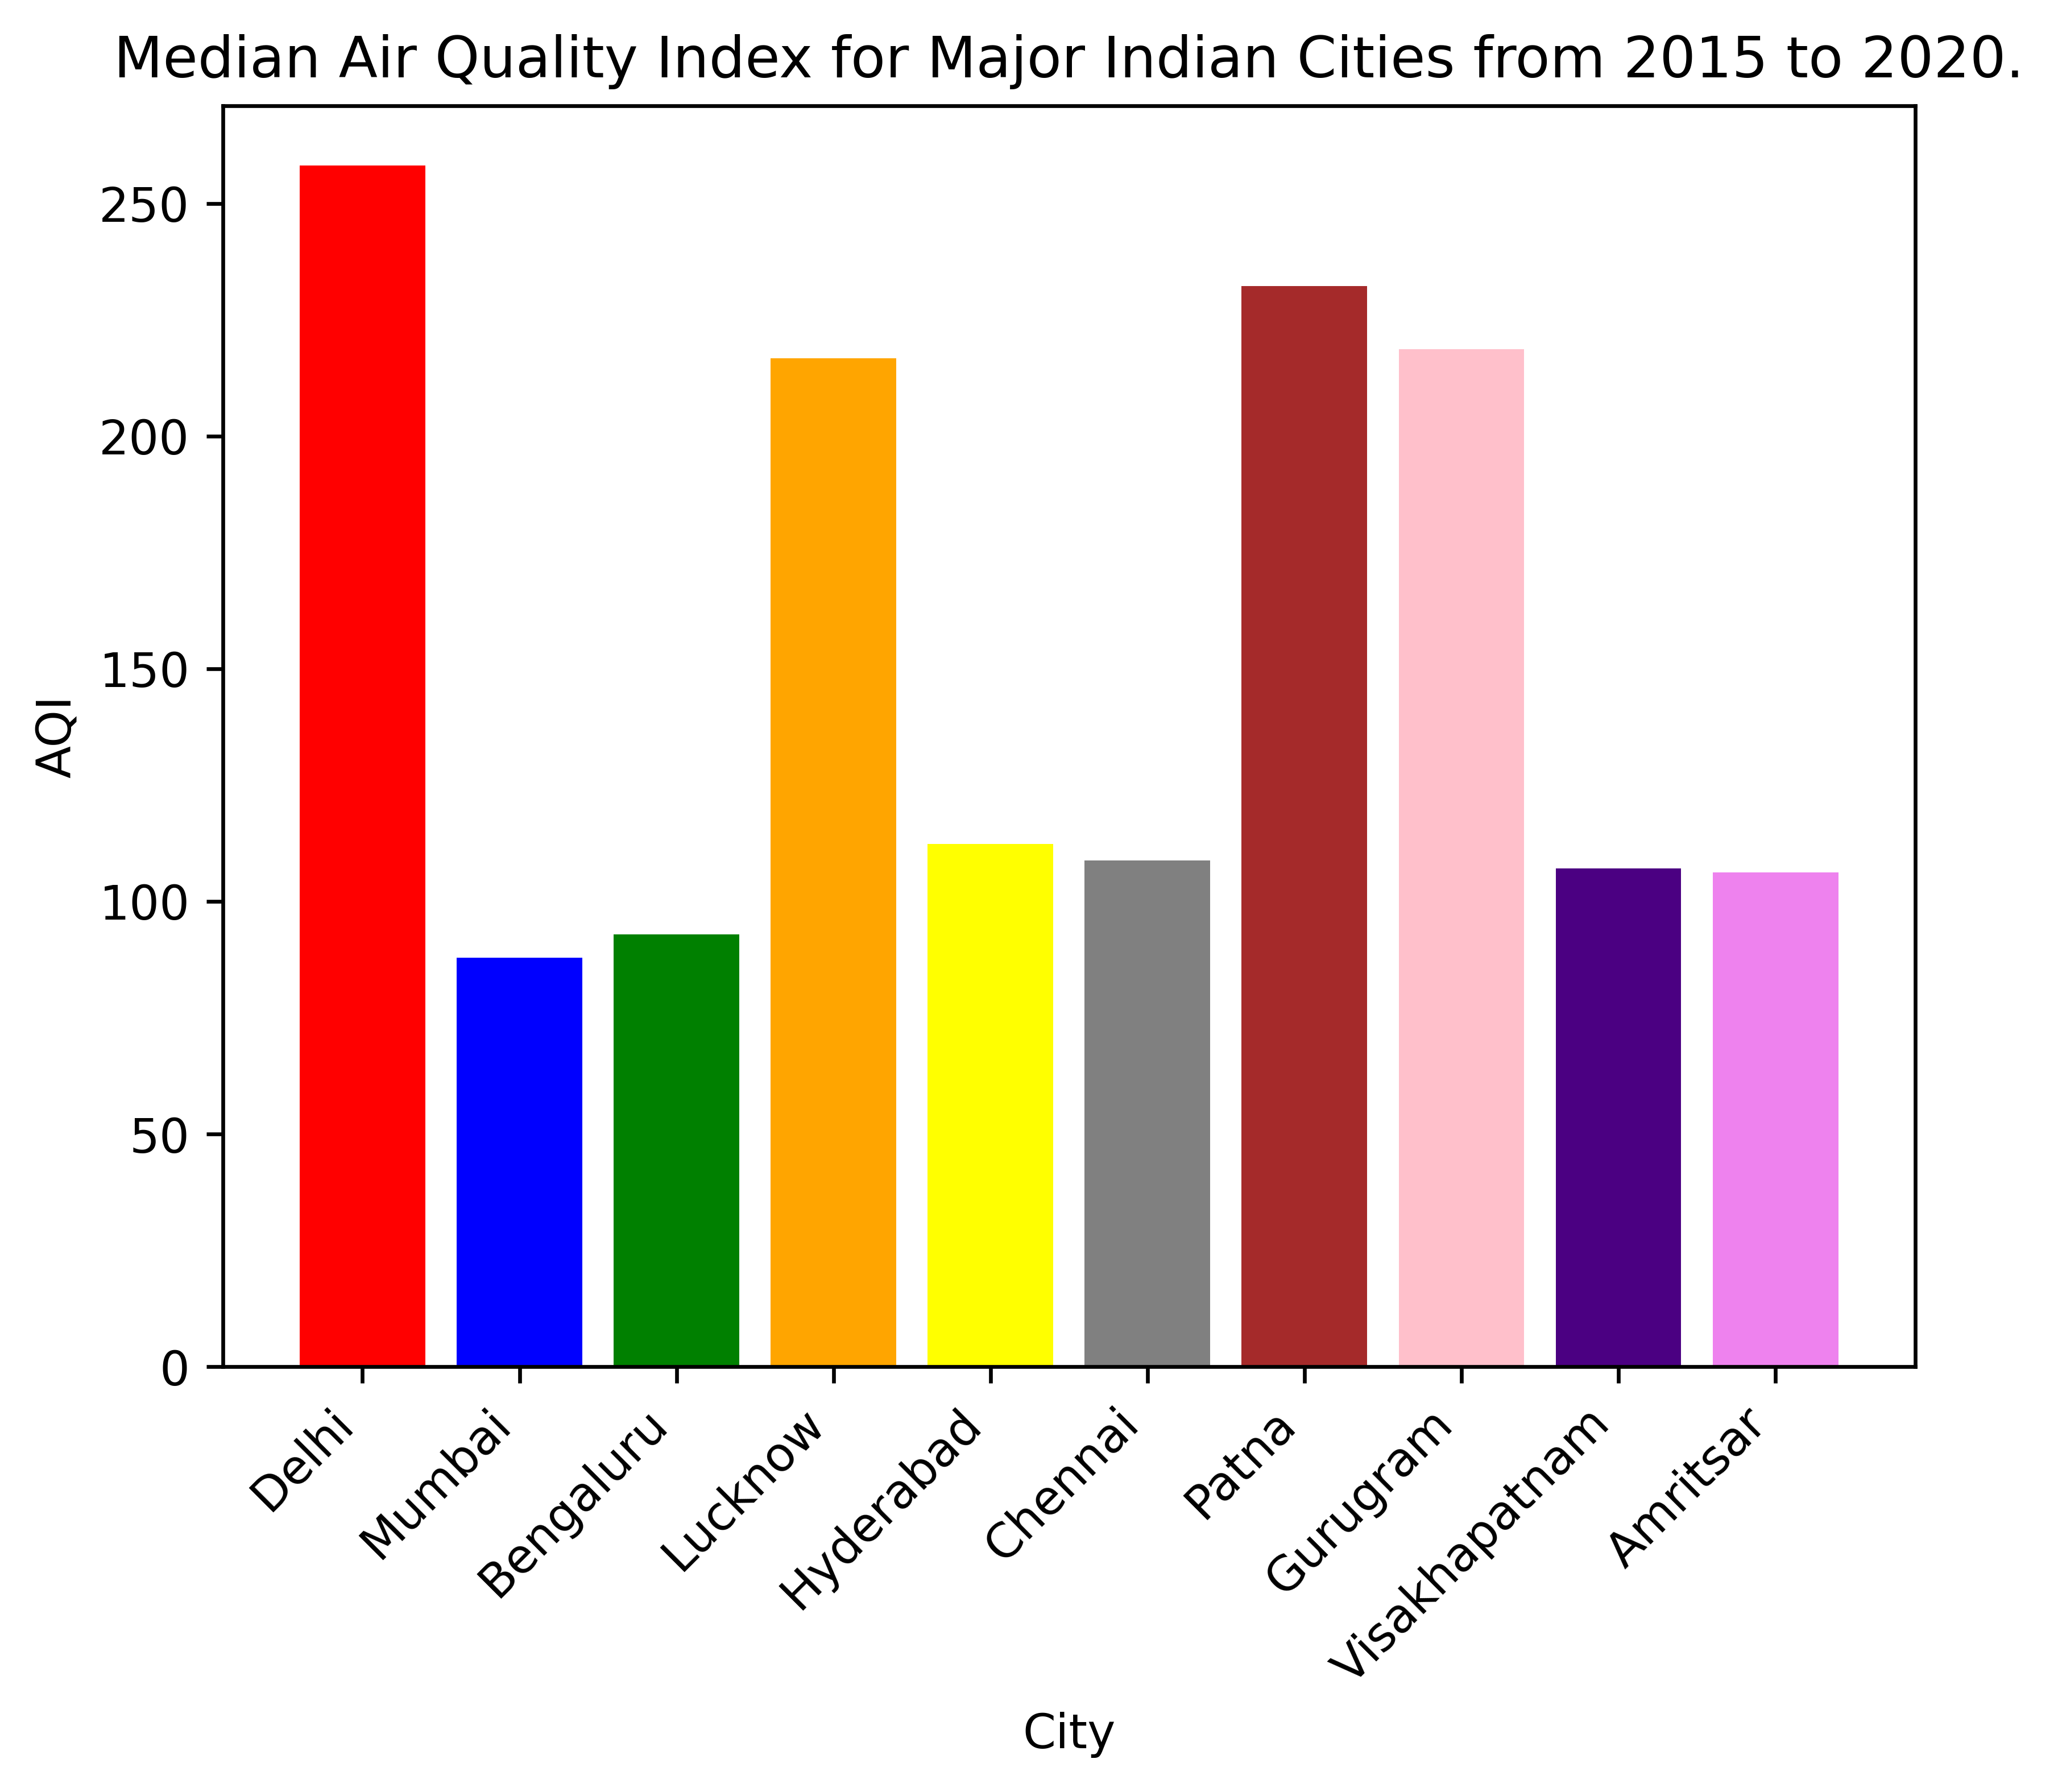

In [24]:
#Plot to Display Median AQI for some of the Major cities.
plt.figure(dpi=600)
plt.bar(majorCities, meanAQI, color=['red', 'blue', 'green', 'orange', 'yellow', 'grey', 'brown', 'pink', 'indigo', 'violet'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('City')
plt.ylabel('AQI')
plt.title('Median Air Quality Index for Major Indian Cities from 2015 to 2020.')
plt.show()

In [25]:
#Correlation matrix and mask for the upper triangle of the matrx.
corMat = dayTrend.corr()
mask = np.triu(np.ones_like(corMat, dtype=bool))
mask

C:\Users\91789\AppData\Local\Temp\ipykernel_15752\1335820388.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corMat = dayTrend.corr()


array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         True,  True,  True,  True],
       [False, False, False,

In [26]:
corMat

PM2.5      PM10        NO       NOx       NO2       NH3        CO  \
PM2.5    1.000000  0.846498  0.433491  0.436792  0.350709  0.275086  0.089909   
PM10     0.846498  1.000000  0.502350  0.527768  0.464380  0.376816  0.112576   
NO       0.433491  0.502350  1.000000  0.794890  0.478069  0.185621  0.212604   
NOx      0.436792  0.527768  0.794890  1.000000  0.627627  0.166224  0.226992   
NO2      0.350709  0.464380  0.478069  0.627627  1.000000  0.234938  0.356521   
NH3      0.275086  0.376816  0.185621  0.166224  0.234938  1.000000  0.104864   
CO       0.089909  0.112576  0.212604  0.226992  0.356521  0.104864  1.000000   
SO2      0.132325  0.256978  0.170322  0.238398  0.392234 -0.038998  0.489693   
O3       0.161238  0.244920  0.014580  0.093170  0.293347  0.094973  0.041736   
Benzene  0.023911  0.022265  0.035773  0.039122  0.025260 -0.015653  0.061858   
Toluene  0.117080  0.169335  0.150859  0.189388  0.273926  0.013226  0.277900   
Xylene   0.114584  0.081703  0.094238  0.087400  0.171705 -0.019806  0.154891   
AQI      0.659180  0.803304  0.452191  0.486437  0.537058  0.251993  0.683338   

              SO2        O3   Benzene   Toluene    Xylene       AQI  
PM2.5    0.132325  0.161238  0.023911  0.117080  0.114584  0.659180  
PM10     0.256978  0.244920  0.022265  0.169335  0.081703  0.803304  
NO       0.170322  0.014580  0.035773  0.150859  0.094238  0.452191  
NOx      0.238398  0.093170  0.039122  0.189388  0.087400  0.486437  
NO2      0.392234  0.293347  0.025260  0.273926  0.171705  0.537058  
NH3     -0.038998  0.094973 -0.015653  0.013226 -0.019806  0.251993  
CO       0.489693  0.041736  0.061858  0.277900  0.154891  0.683338  
SO2      1.000000  0.162143  0.036110  0.296138  0.251192  0.490590  
O3       0.162143  1.000000  0.020254  0.130209  0.111411  0.198975  
Benzene  0.036110  0.020254  1.000000  0.739286  0.415414  0.044394  
Toluene  0.296138  0.130209  0.739286  1.000000  0.421439  0.279991  
Xylene   0.251192  0.111411  0.415414  0.421439  1.000000  0.165528  
AQI      0.490590  0.198975  0.044394  0.279991  0.165528  1.000000

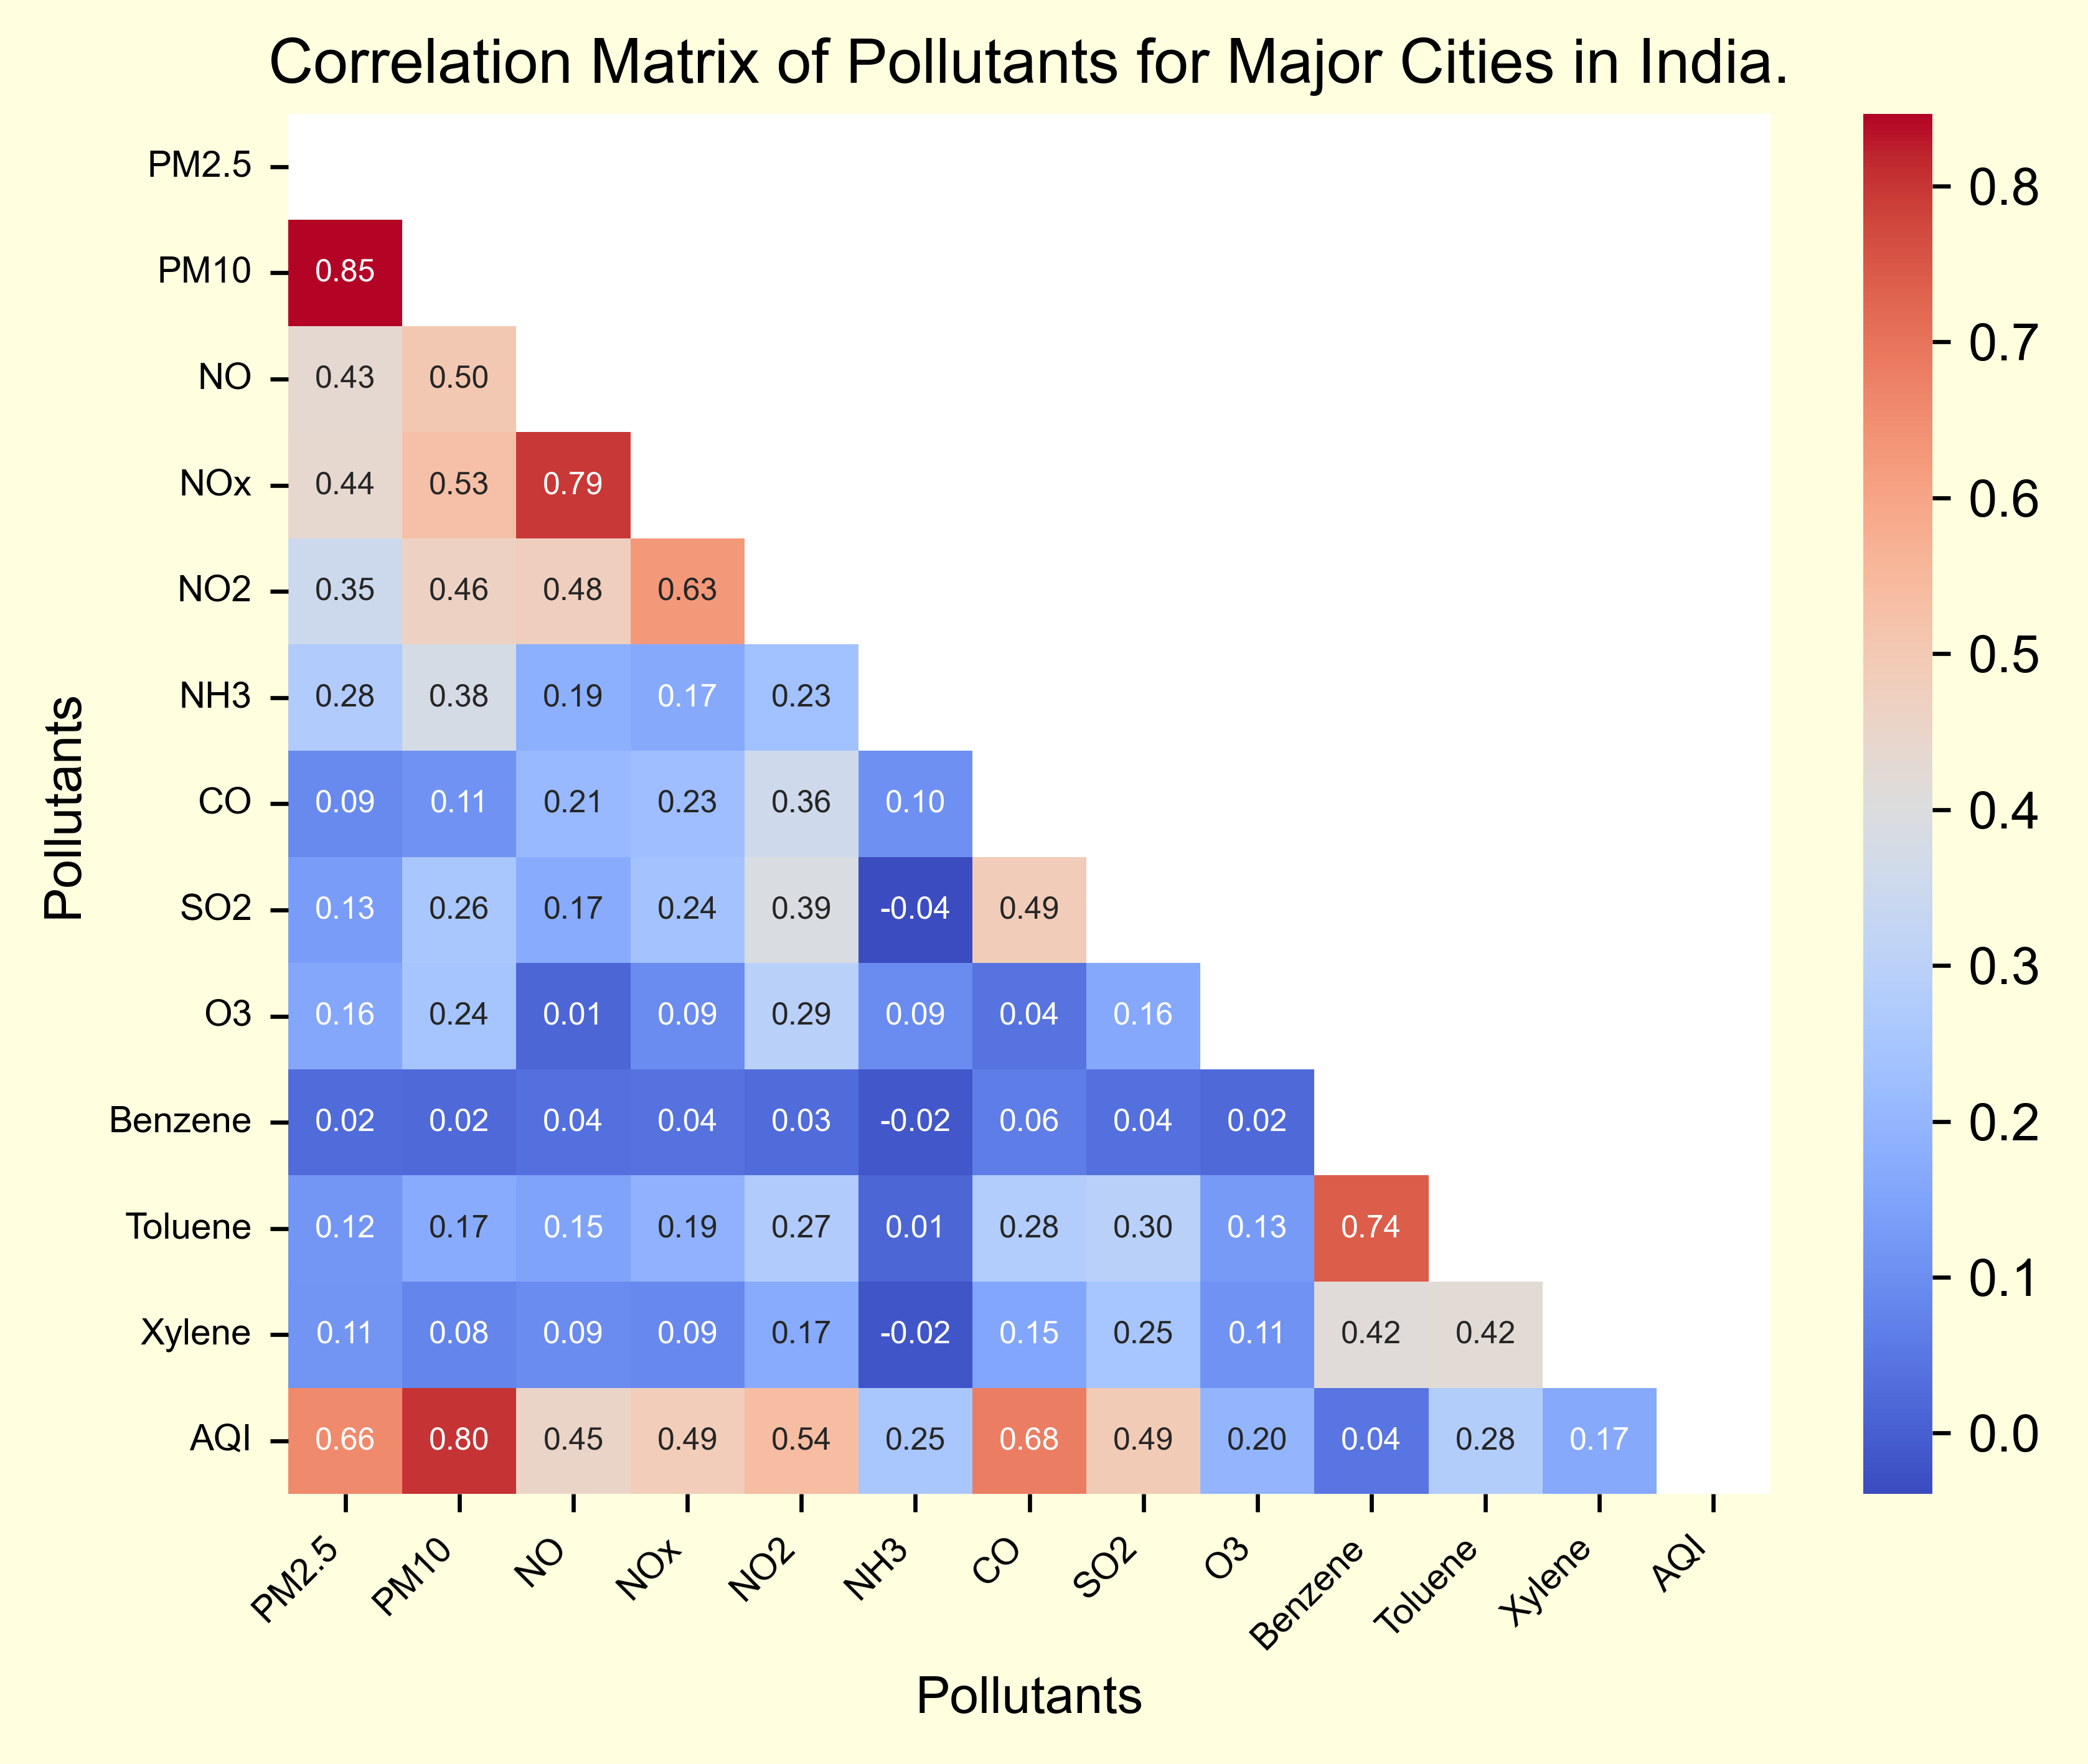

In [27]:
#Seaborn heatmap for the pollutants.
plt.figure(dpi=600, facecolor='lightyellow')
sns.heatmap(corMat, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':6})
plt.xlabel('Pollutants')
plt.ylabel('Pollutants')
plt.xticks(fontsize=7, rotation=45, ha='right')
plt.yticks(fontsize=7)
plt.title('Correlation Matrix of Pollutants for Major Cities in India.')
sns.set_style('darkgrid')

In [28]:
monthTrend.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1005 entries, 2015-01-31 to 2020-07-31
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PM2.5       893 non-null    float64
 1   PM10        680 non-null    float64
 2   NO          934 non-null    float64
 3   NOx         897 non-null    float64
 4   NO2         934 non-null    float64
 5   NH3         702 non-null    float64
 6   CO          980 non-null    float64
 7   SO2         936 non-null    float64
 8   O3          930 non-null    float64
 9   Benzene     858 non-null    float64
 10  Toluene     768 non-null    float64
 11  Xylene      419 non-null    float64
 12  AQI         911 non-null    float64
 13  AQI_Bucket  911 non-null    object 
 14  City        1005 non-null   object 
dtypes: float64(13), object(2)
memory usage: 125.6+ KB


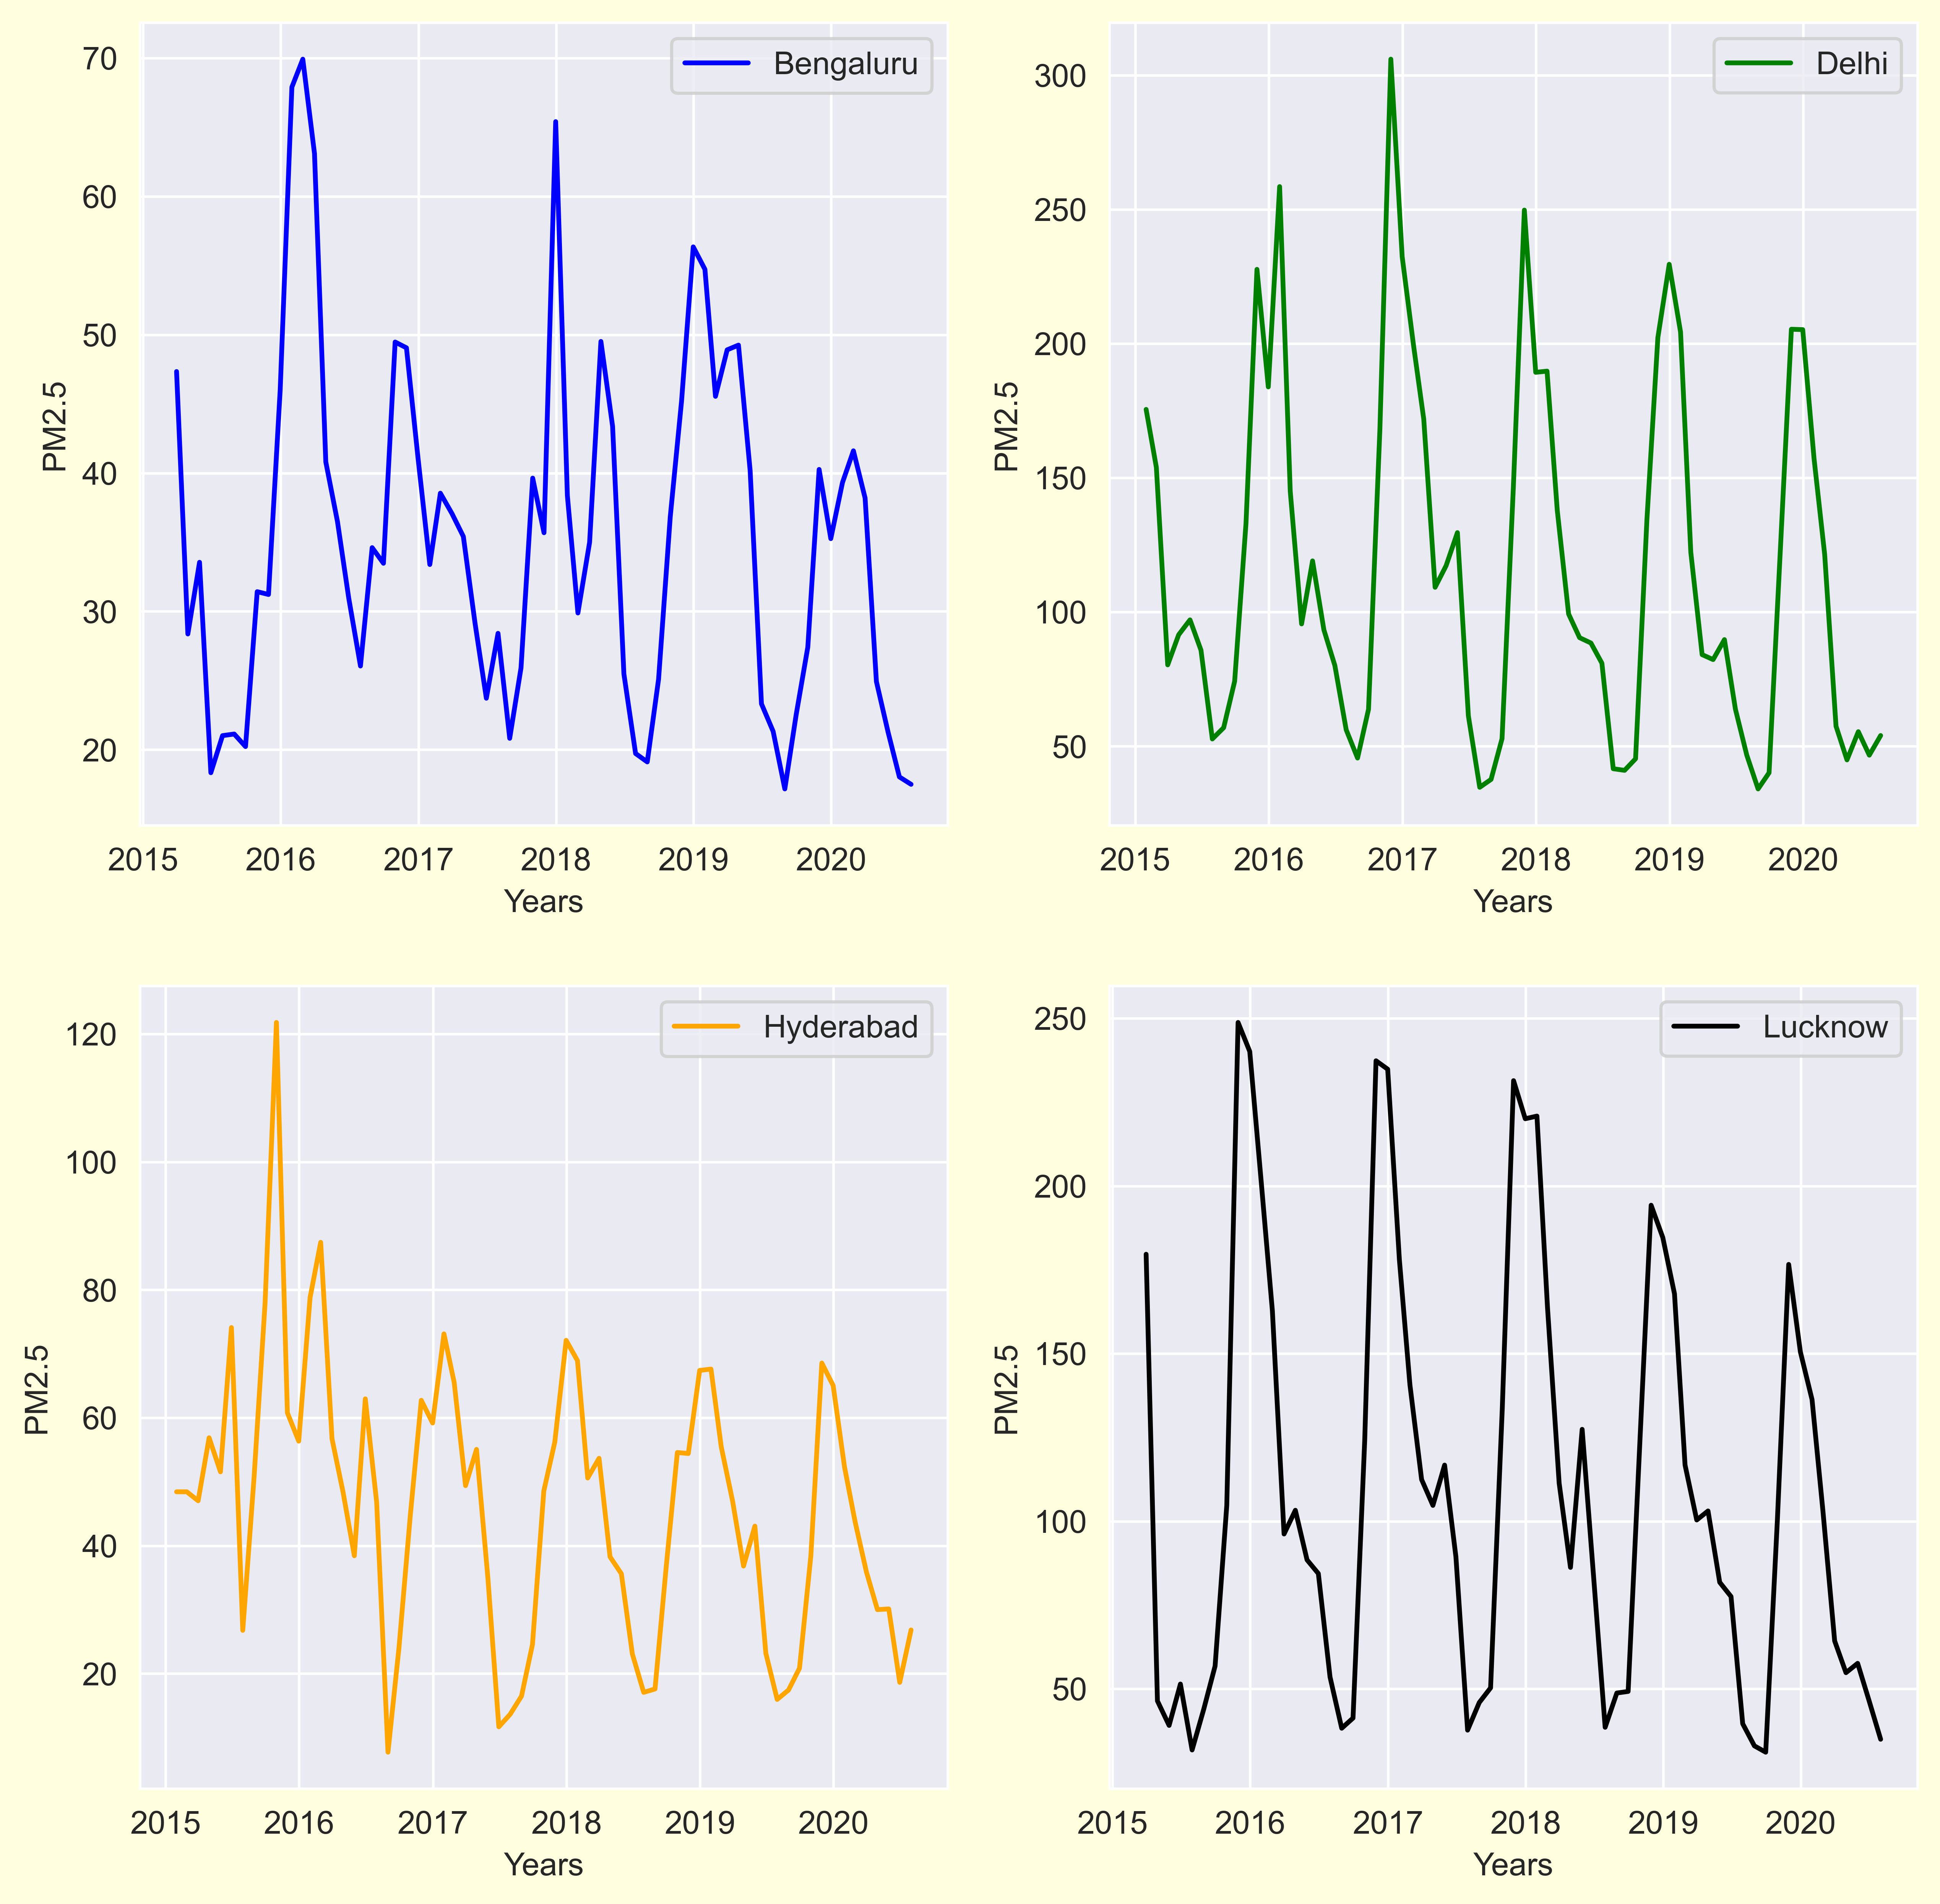

In [29]:
#Subplots for variation of PM2.5 for some cities.
plt.figure(figsize=(10, 10), dpi=600, facecolor='lightyellow')
plt.subplot(2, 2, 1)
plt.plot(monthTrend[monthTrend['City'] == 'Bengaluru']['PM2.5'], label='Bengaluru', color='blue')
plt.xlabel('Years')
plt.ylabel('PM2.5')
plt.legend()
plt.subplot(2, 2, 2)
plt.plot(monthTrend[monthTrend['City'] == 'Delhi']['PM2.5'], label='Delhi', color='green')
plt.xlabel('Years')
plt.ylabel('PM2.5')
plt.legend()
plt.subplot(2, 2, 3)
plt.plot(monthTrend[monthTrend['City'] == 'Hyderabad']['PM2.5'].fillna(monthTrend[monthTrend['City'] == 'Hyderabad']['PM2.5'].median()), label='Hyderabad', color='orange')
plt.xlabel('Years')
plt.ylabel('PM2.5')
plt.legend()
plt.subplot(2, 2, 4)
plt.plot(monthTrend[monthTrend['City'] == 'Lucknow']['PM2.5'], color='Black', label='Lucknow')
plt.xlabel('Years')
plt.ylabel('PM2.5')
plt.legend()

In [30]:
#Removing Outliers to draw relation.
cleanData = dayTrend[dayTrend['AQI'] < 400]
pm2_5 = cleanData['PM2.5']
pm10 = cleanData['PM10']
aqi = cleanData['AQI']


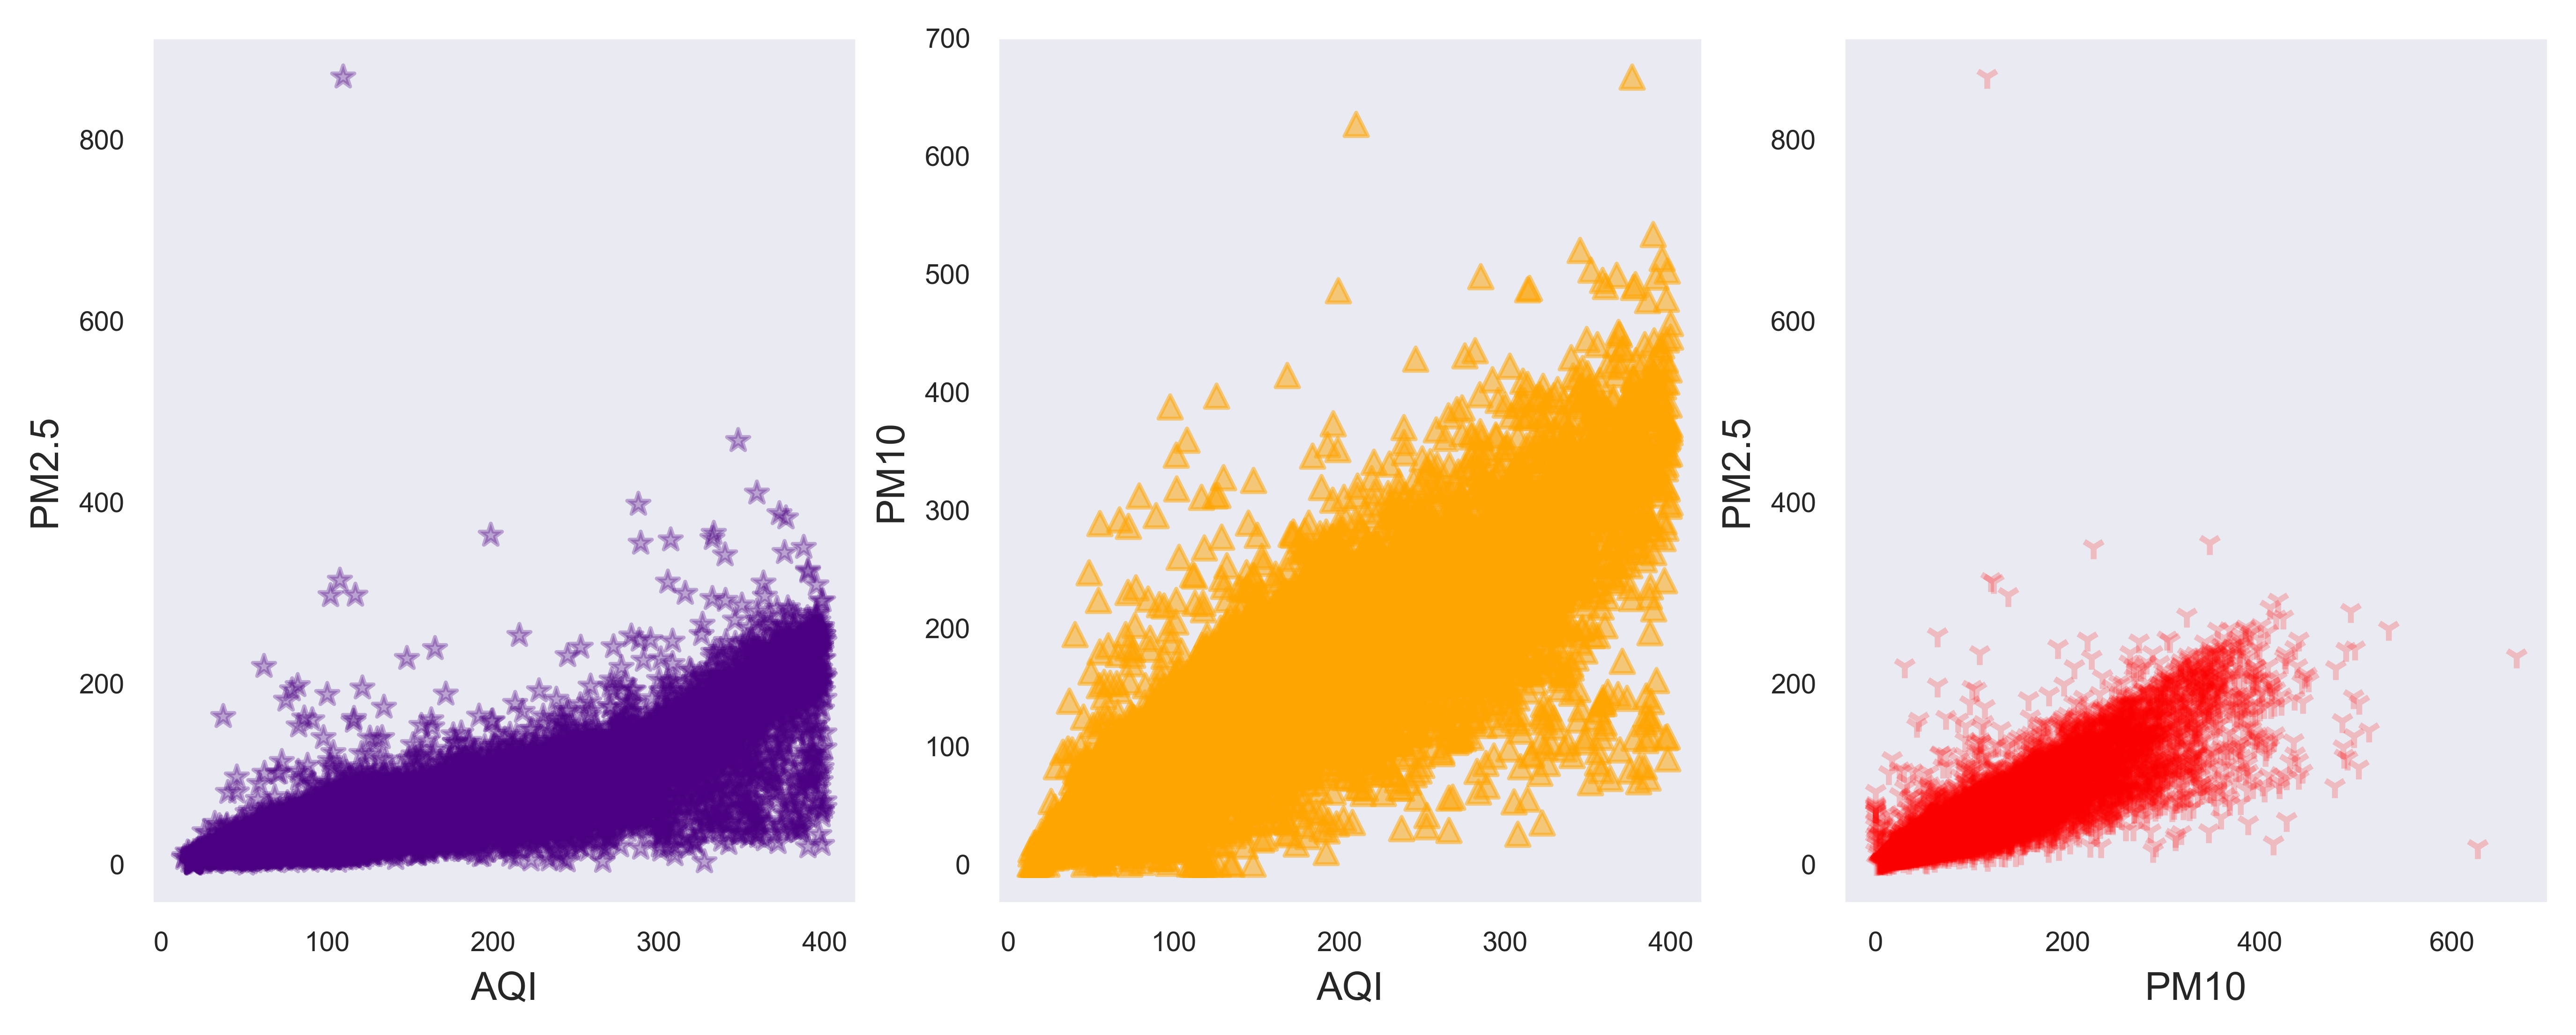

In [31]:
#Subplots to show the relation between AQI, PM2.5 and PM10.
plt.figure(figsize=(11, 4), dpi=600)
plt.subplot(1, 3, 1)
plt.scatter(aqi, pm2_5, alpha=0.3, marker='*', color='indigo')
plt.grid(False)
plt.ylabel('PM2.5')
plt.xlabel('AQI')
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)
plt.subplot(1, 3, 2)
plt.scatter(aqi, pm10, alpha=0.5, color='orange', marker='^')
plt.grid(False)
plt.ylabel('PM10')
plt.xlabel('AQI')
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)
plt.subplot(1, 3, 3)
plt.scatter(pm10, pm2_5, alpha=0.2, color='red', marker='1')
plt.grid(False)
plt.xlabel('PM10')
plt.ylabel('PM2.5')
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)
plt.show()

In [32]:
monthTrend['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

## Bengaluru Case Study

In this section, I present insights and patterns related to the city of Bengaluru:

1. **Variations of Pollutants Over the Years**: I have illustrated the variations of PM2.5, PM10, Carbon Monoxide, and Sulphur Dioxide using line plots.
2. **Distribution of Pollutant Values**: The distribution of pollutant values over the years is shown using violin plots.
3. **Distribution of AQI Buckets**: I have displayed the distribution of AQI_Buckets using a Seaborn histogram, along with an added KDE curve.
4. **Relationship Between PM10 and PM2.5**: The relationship between PM10 and PM2.5 is illustrated using a Seaborn scatter plot, with the AQI_Bucket category represented as hue.
5. **Pairplot for Multiple Pollutants**: A pair plot has been created for PM10, AQI, PM2.5, and SO2.


In [33]:
#Filtering the day Entries and month Entries for Bengaluru.
bengDay = dayTrend[dayTrend['City'] == 'Bengaluru']
bengMonth = monthTrend[monthTrend['City'] == 'Bengaluru']

In [34]:
bengDay.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2009 entries, 2015-01-01 to 2020-07-01
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        2009 non-null   object 
 1   PM2.5       1863 non-null   float64
 2   PM10        1649 non-null   float64
 3   NO          2003 non-null   float64
 4   NOx         2005 non-null   float64
 5   NO2         2003 non-null   float64
 6   NH3         1806 non-null   float64
 7   CO          1998 non-null   float64
 8   SO2         2003 non-null   float64
 9   O3          1865 non-null   float64
 10  Benzene     1743 non-null   float64
 11  Toluene     1916 non-null   float64
 12  Xylene      0 non-null      float64
 13  AQI         1910 non-null   float64
 14  AQI_Bucket  1910 non-null   object 
dtypes: float64(13), object(2)
memory usage: 251.1+ KB


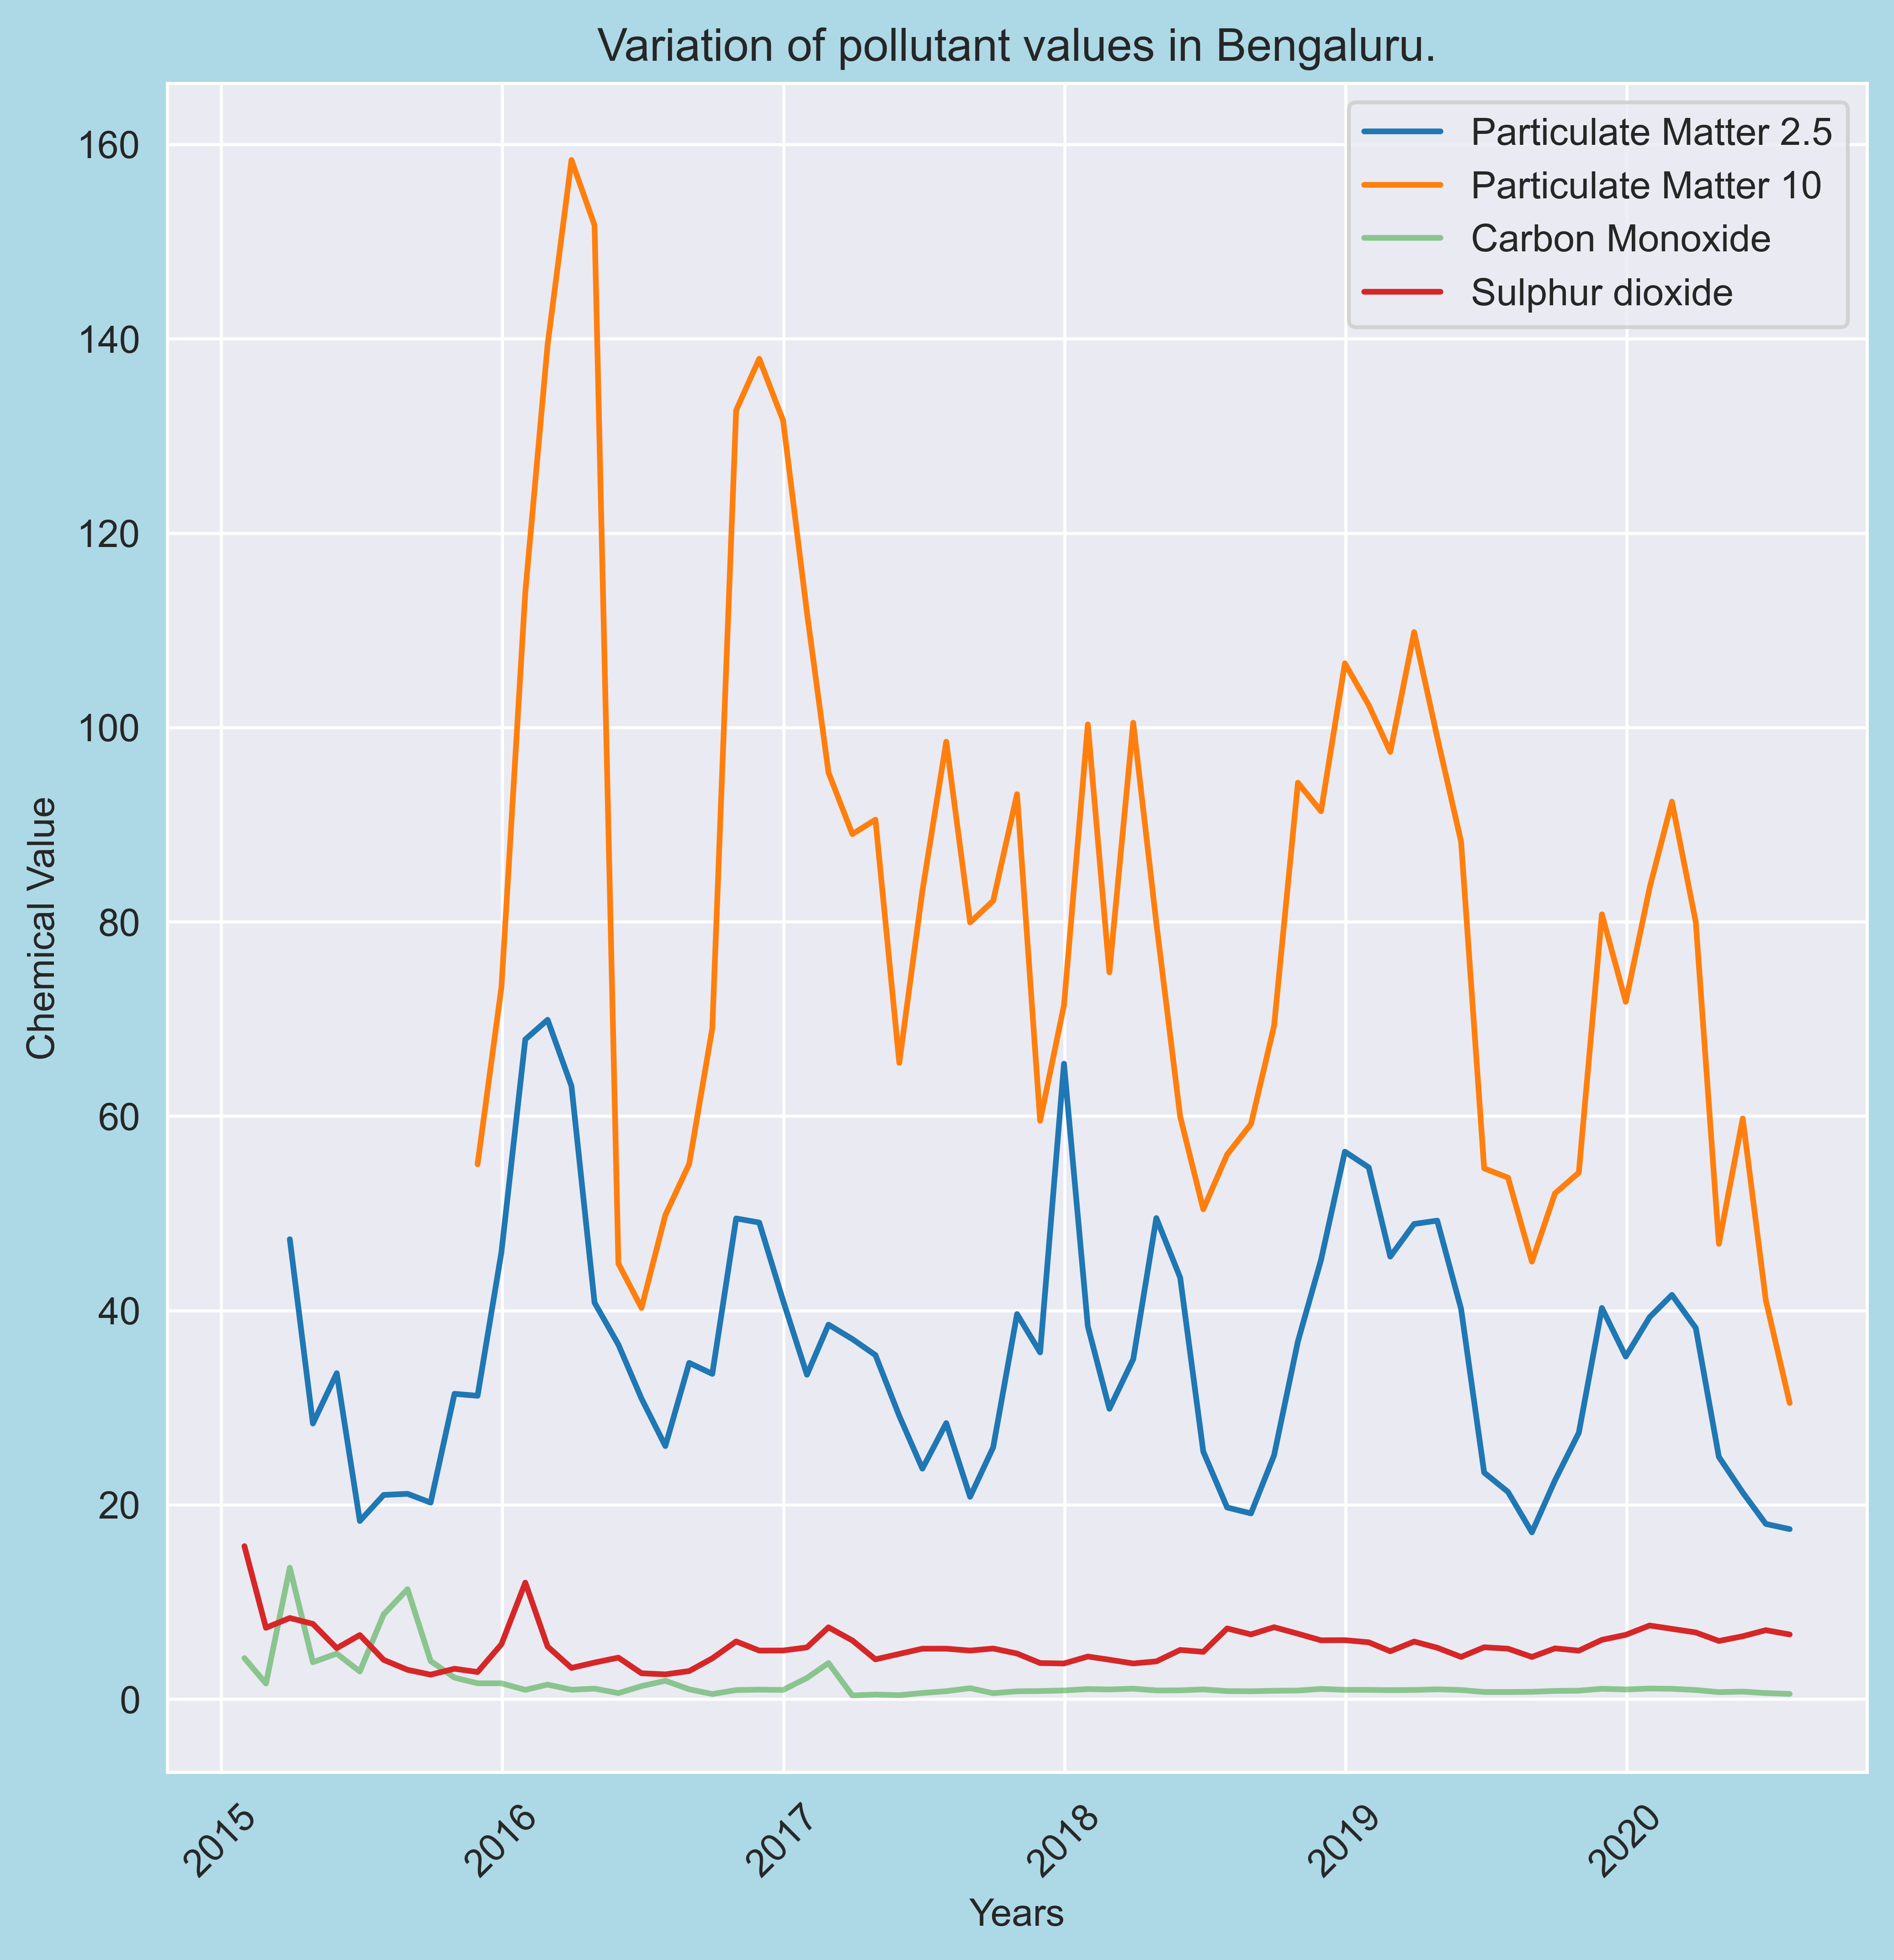

In [35]:
#Plotting variation for PM2.5, PM10, CO and SO2.
plt.figure(dpi=600, figsize=(8, 8), facecolor='lightblue')
plt.title('Variation of pollutant values in Bengaluru.')
plt.plot(bengMonth['PM2.5'], label='Particulate Matter 2.5')
plt.plot(bengMonth['PM10'], label='Particulate Matter 10')
plt.plot(bengMonth['CO'], label='Carbon Monoxide', alpha=0.5)
plt.plot(bengMonth['SO2'], label='Sulphur dioxide')
plt.xlabel('Years')
plt.xticks(rotation=45)
plt.ylabel('Chemical Value')
plt.legend()

<Axes: title={'center': 'Violin plot for Pollutants in Bengaluru.'}, xlabel='Pollutants', ylabel='Value'>

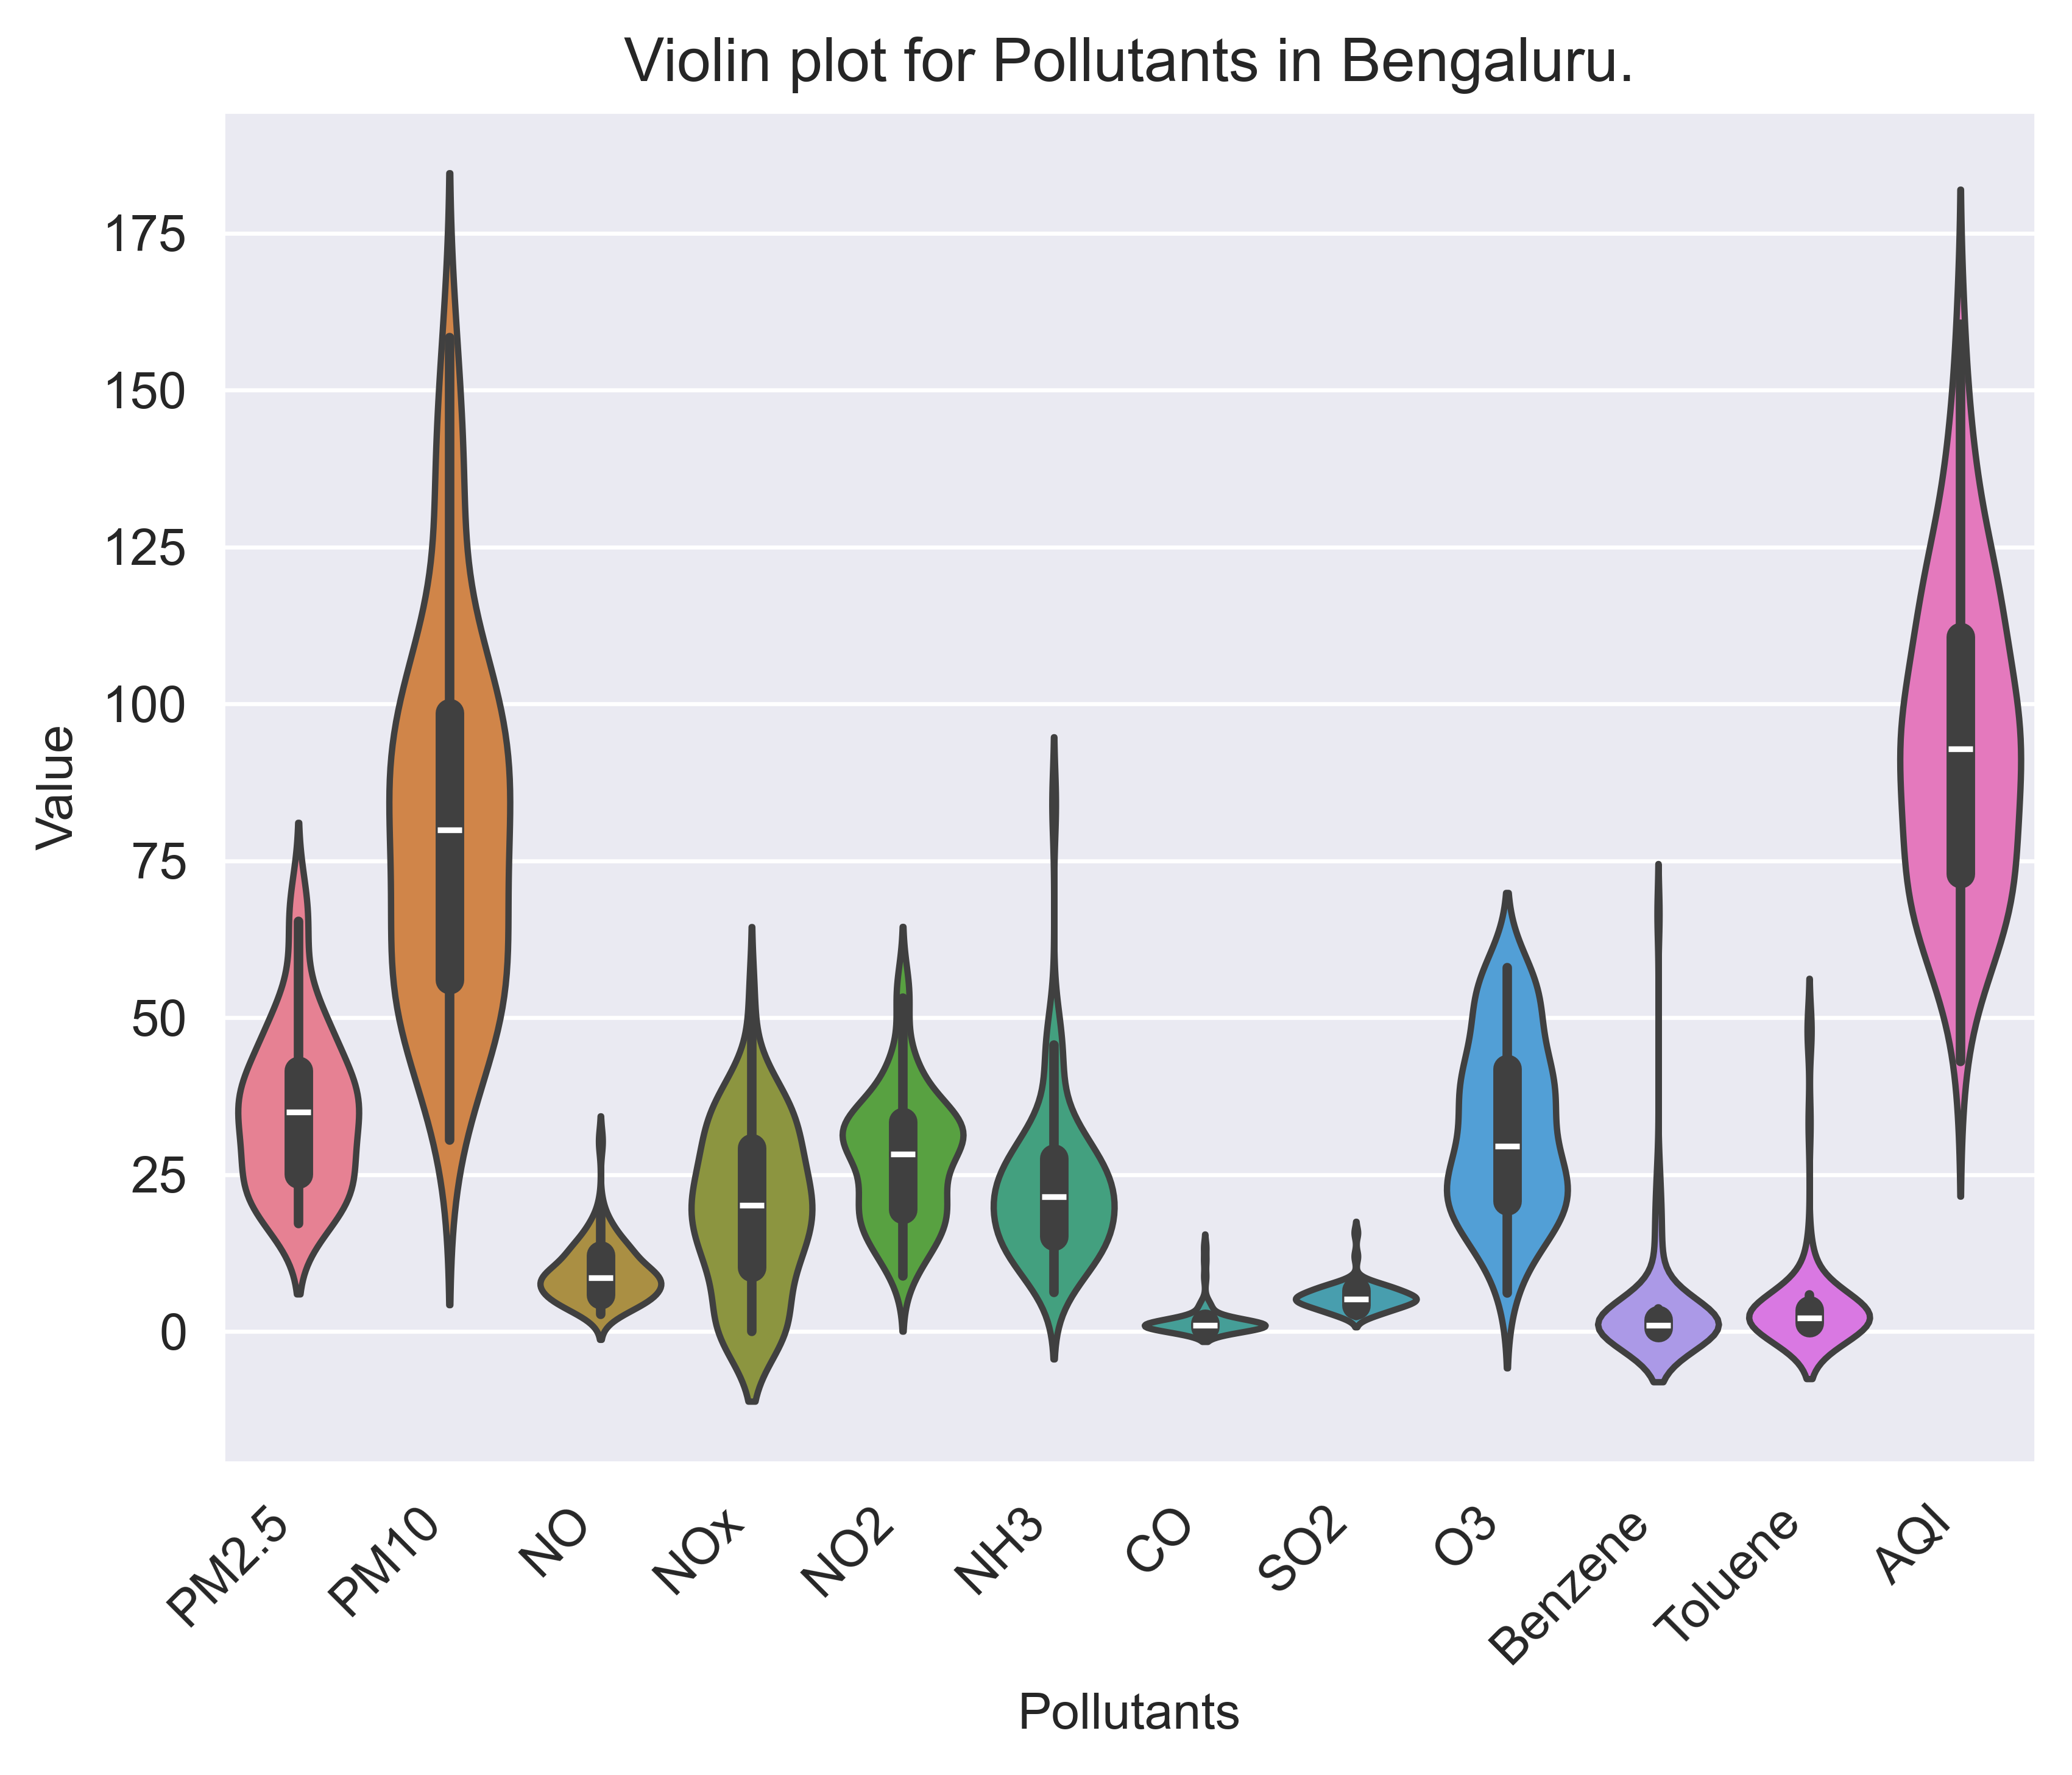

In [36]:
#Violin plot for pollutants in Bengaluru.
plt.figure(dpi=600)
plt.title('Violin plot for Pollutants in Bengaluru.')
plt.ylabel('Value')
plt.xlabel('Pollutants')
plt.xticks(rotation=45, ha='right')
sns.violinplot(bengMonth.drop(columns=['Xylene']))

<Axes: title={'center': 'Distribution of Severities of AQI in Bengaluru.'}, xlabel='AQI_Bucket', ylabel='Count'>

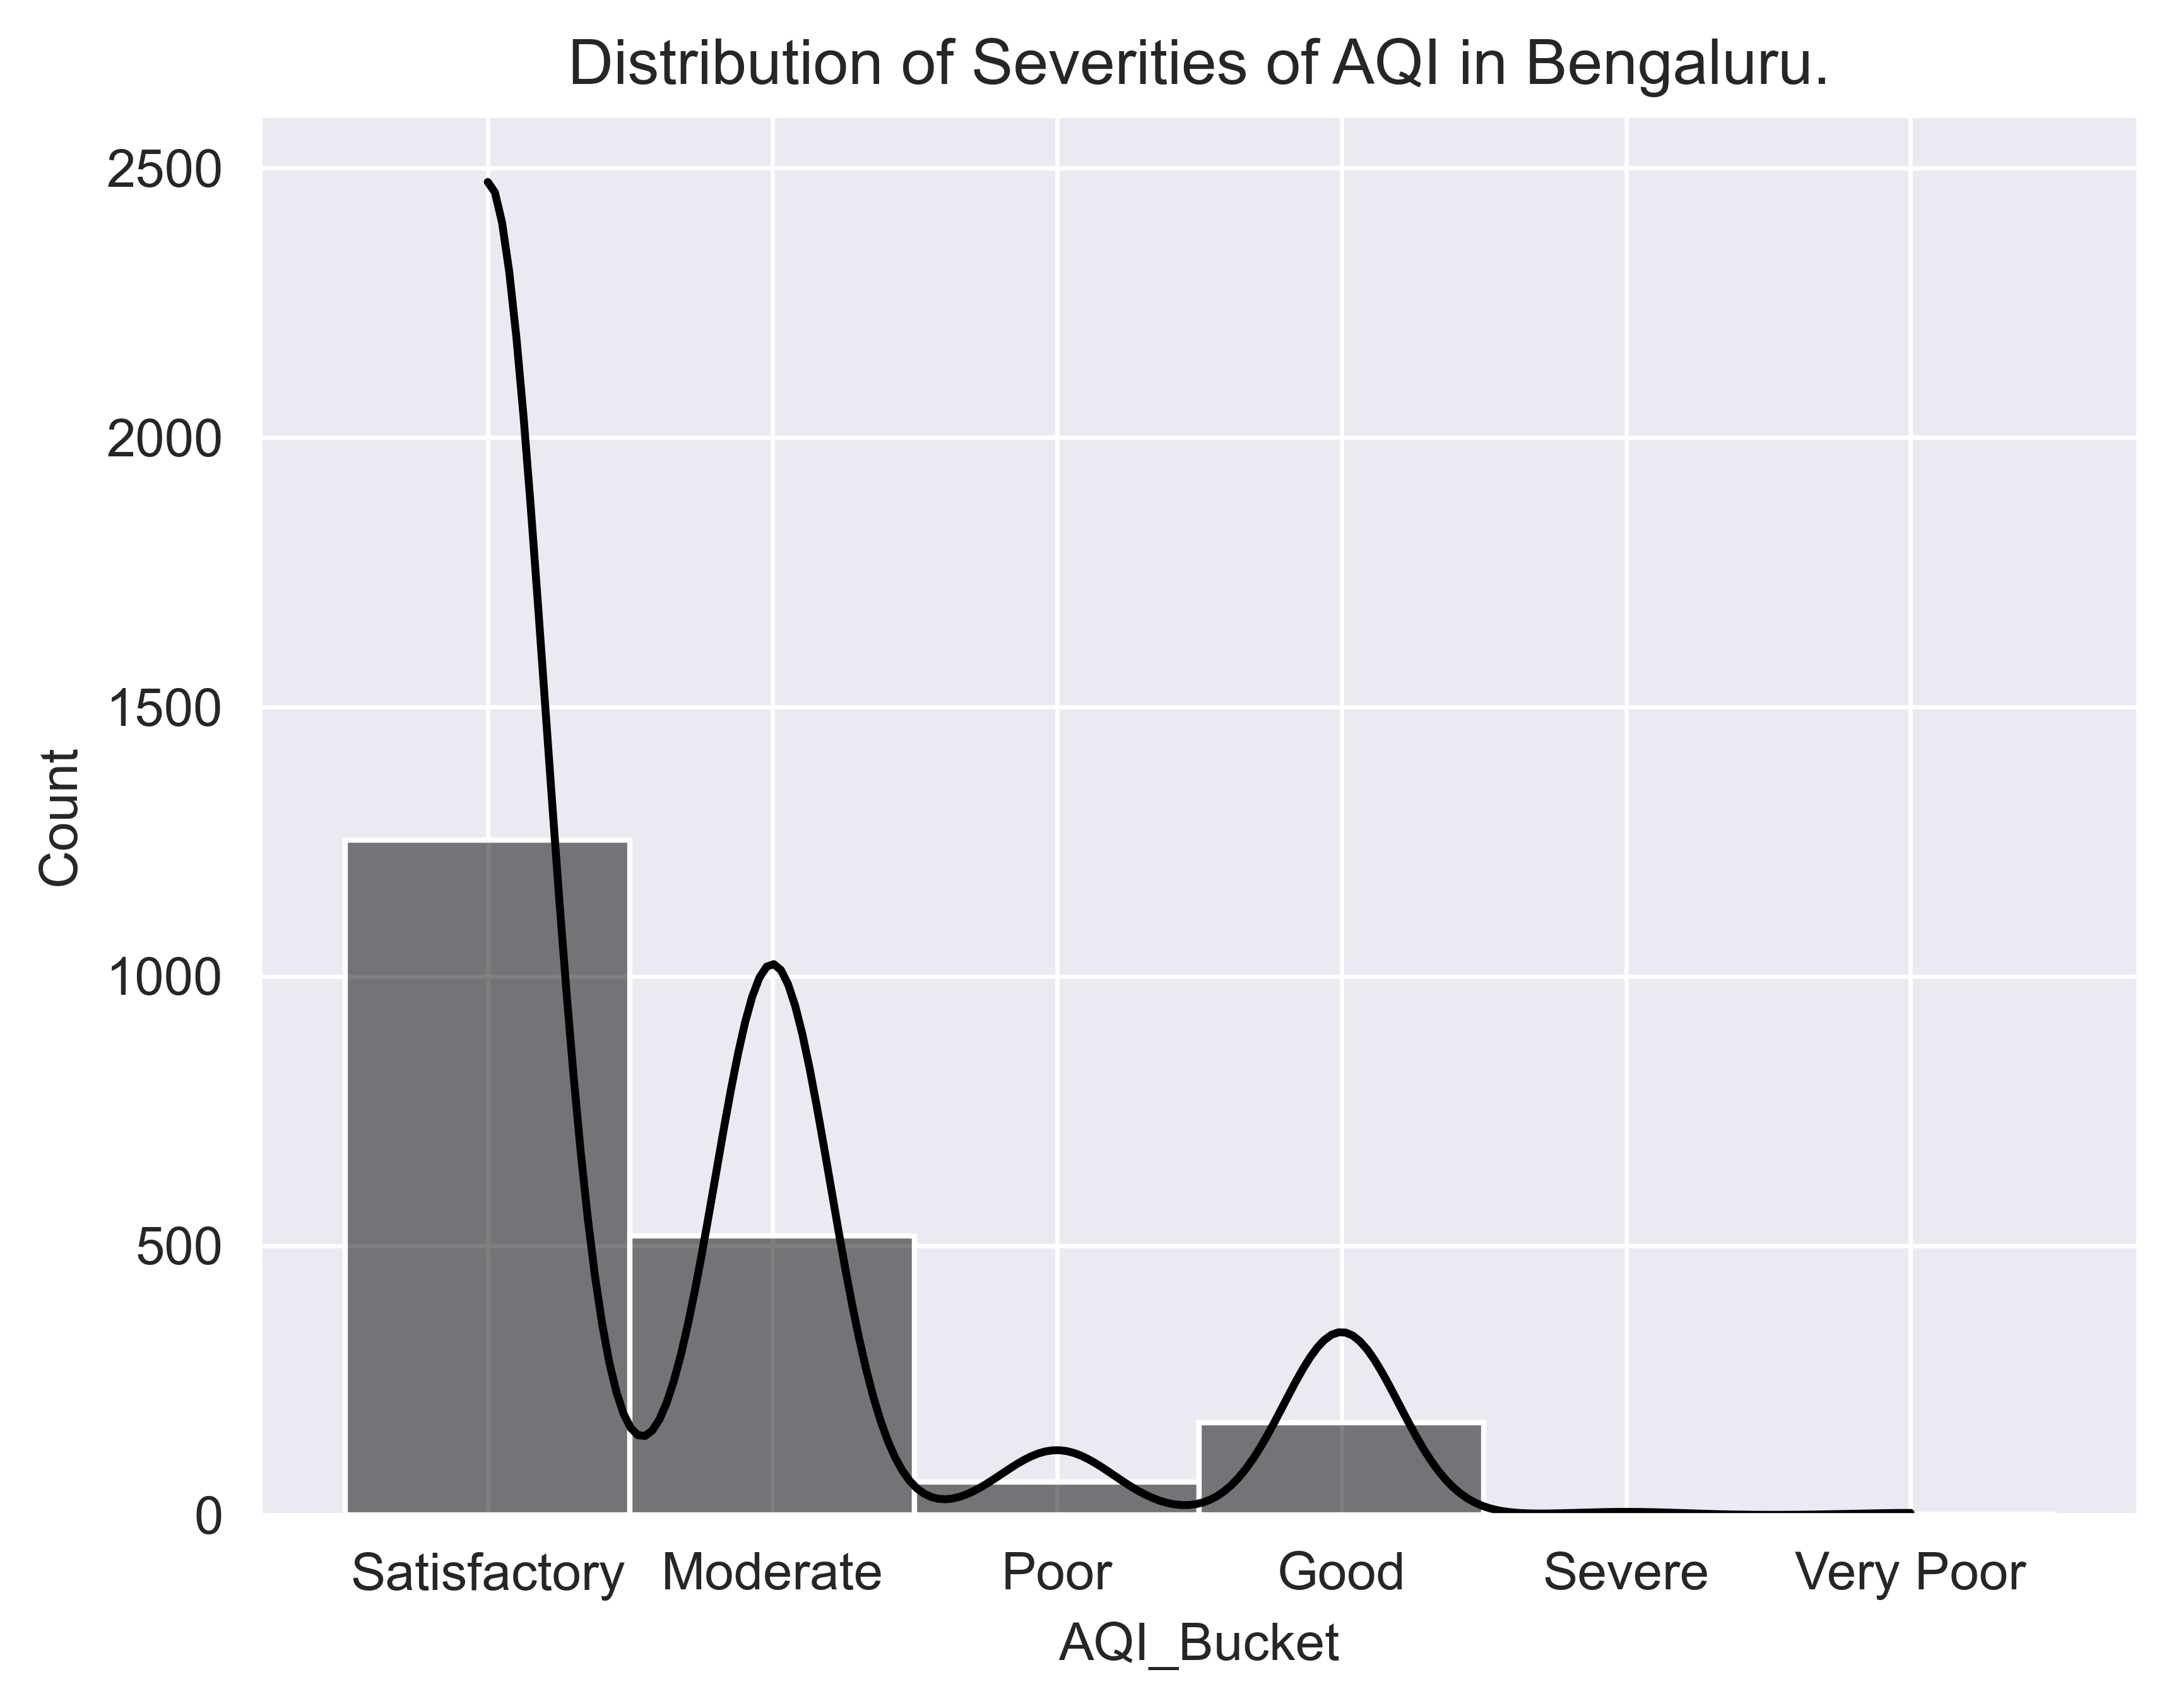

In [37]:
#Histogram for the Distribution of Severities.
plt.figure(dpi=600)
plt.title('Distribution of Severities of AQI in Bengaluru.')
sns.histplot(bengDay['AQI_Bucket'].fillna(bengDay['AQI_Bucket'].mode()[0]), kde=True, color='Black')

<Axes: title={'center': 'Relationship between PM2.5 and PM10 for Different Severities.'}, xlabel='PM2.5', ylabel='PM10'>

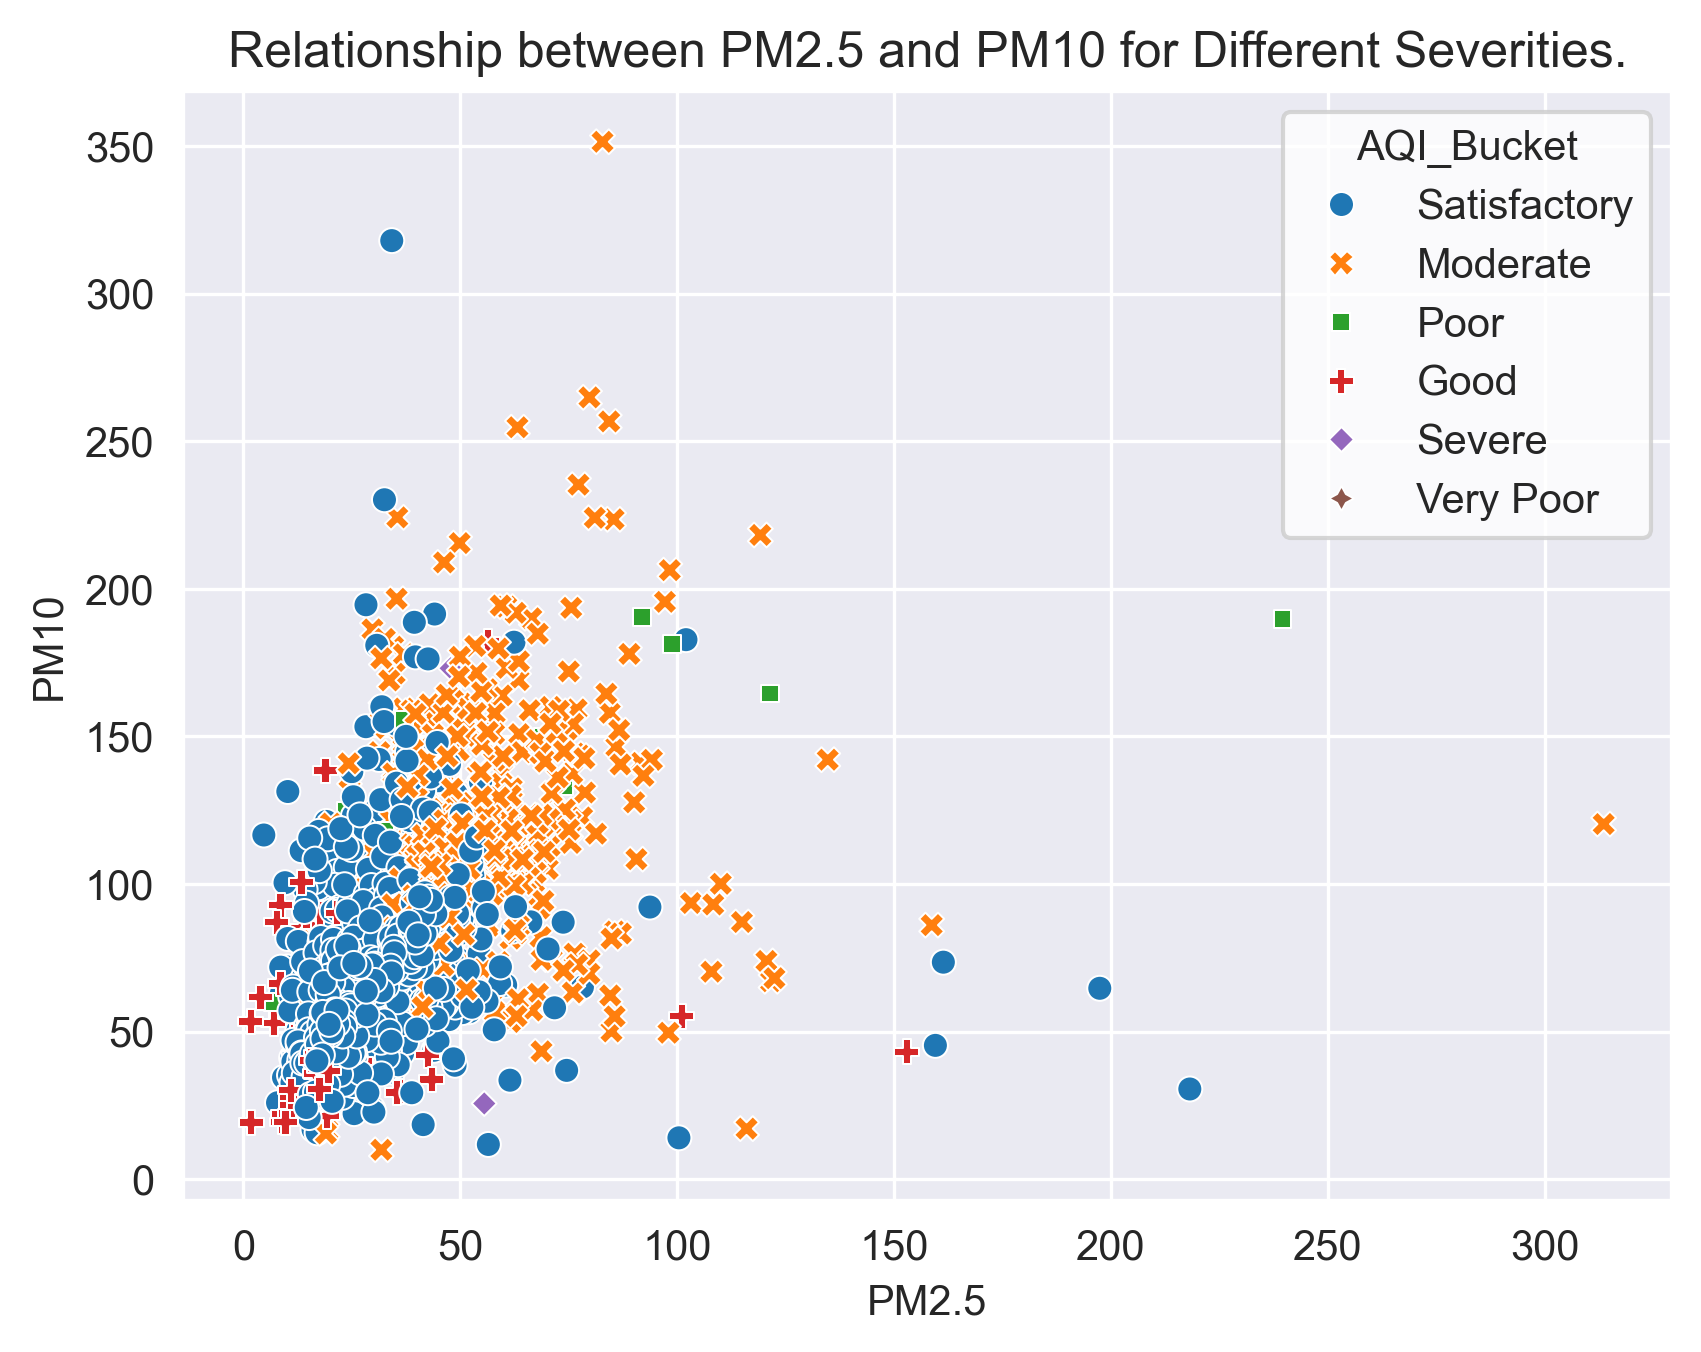

In [38]:
#Scatterplot for relationship between PM2.5 and PM10 based on category 'AQI_Bucket'.
plt.figure(dpi=300)
plt.title('Relationship between PM2.5 and PM10 for Different Severities.')
sns.set_style('whitegrid')
sns.scatterplot(x=bengDay['PM2.5'], y=bengDay['PM10'], hue=bengDay['AQI_Bucket'], style=bengDay['AQI_Bucket'])

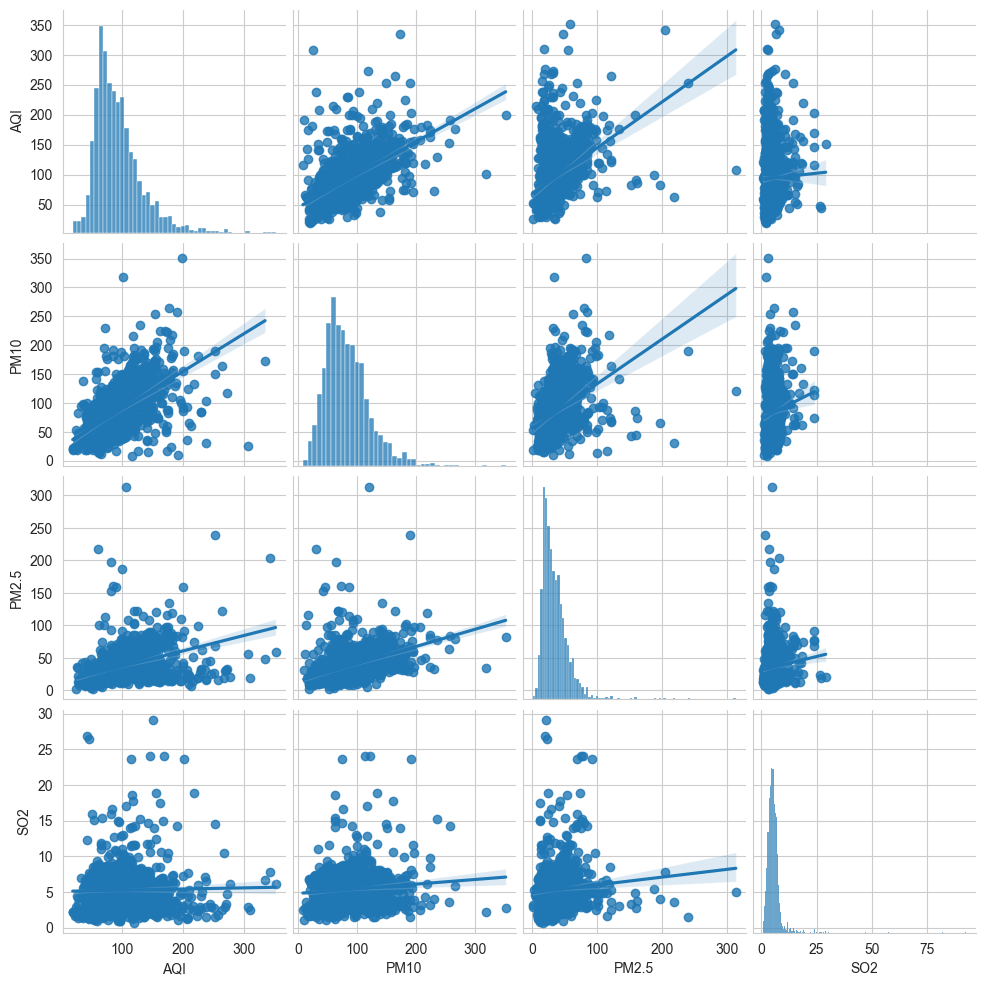

In [39]:
#PairPlot for AQI, PM10, PM2.5 and SO2.
sns.pairplot(bengDay[['AQI', 'PM10', 'PM2.5', 'SO2']], kind='reg')

## Case Study: Delhi

In this section, I draw some patterns and insights related to the city of Delhi. Here, I plot the following graphs:

1. **Line Plot** to show variations of PM10, PM2.5, SO, and CO in Delhi over the years.
2. **Pie Chart** for the distribution of AQI_Buckets.
3. **Line Plot** to show the variation of Oxides of Nitrogen in Delhi from March 2020 to April 2020.
4. **Histogram** to show the distribution of AQI in Delhi.
5. **Joint Plot** to show the relationship between PM2.5 and PM10 in Delhi.


In [40]:
#Retrieveing Daily entries for Delhi.
delhiDay = dayTrend[dayTrend['City'] == 'Delhi']

In [41]:
#Retrieveing Monthly entries for Delhi.
delhiMonth = monthTrend[monthTrend['City'] == 'Delhi']

In [42]:
delhiDay.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2009 entries, 2015-01-01 to 2020-07-01
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        2009 non-null   object 
 1   PM2.5       2007 non-null   float64
 2   PM10        1932 non-null   float64
 3   NO          2007 non-null   float64
 4   NOx         2009 non-null   float64
 5   NO2         2007 non-null   float64
 6   NH3         2000 non-null   float64
 7   CO          2009 non-null   float64
 8   SO2         1899 non-null   float64
 9   O3          1925 non-null   float64
 10  Benzene     2009 non-null   float64
 11  Toluene     2009 non-null   float64
 12  Xylene      1228 non-null   float64
 13  AQI         1999 non-null   float64
 14  AQI_Bucket  1999 non-null   object 
dtypes: float64(13), object(2)
memory usage: 251.1+ KB


In [43]:
delhiMonth.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 67 entries, 2015-01-31 to 2020-07-31
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PM2.5       67 non-null     float64
 1   PM10        67 non-null     float64
 2   NO          67 non-null     float64
 3   NOx         67 non-null     float64
 4   NO2         67 non-null     float64
 5   NH3         67 non-null     float64
 6   CO          67 non-null     float64
 7   SO2         66 non-null     float64
 8   O3          66 non-null     float64
 9   Benzene     67 non-null     float64
 10  Toluene     67 non-null     float64
 11  Xylene      46 non-null     float64
 12  AQI         67 non-null     float64
 13  AQI_Bucket  67 non-null     object 
 14  City        67 non-null     object 
dtypes: float64(13), object(2)
memory usage: 8.4+ KB


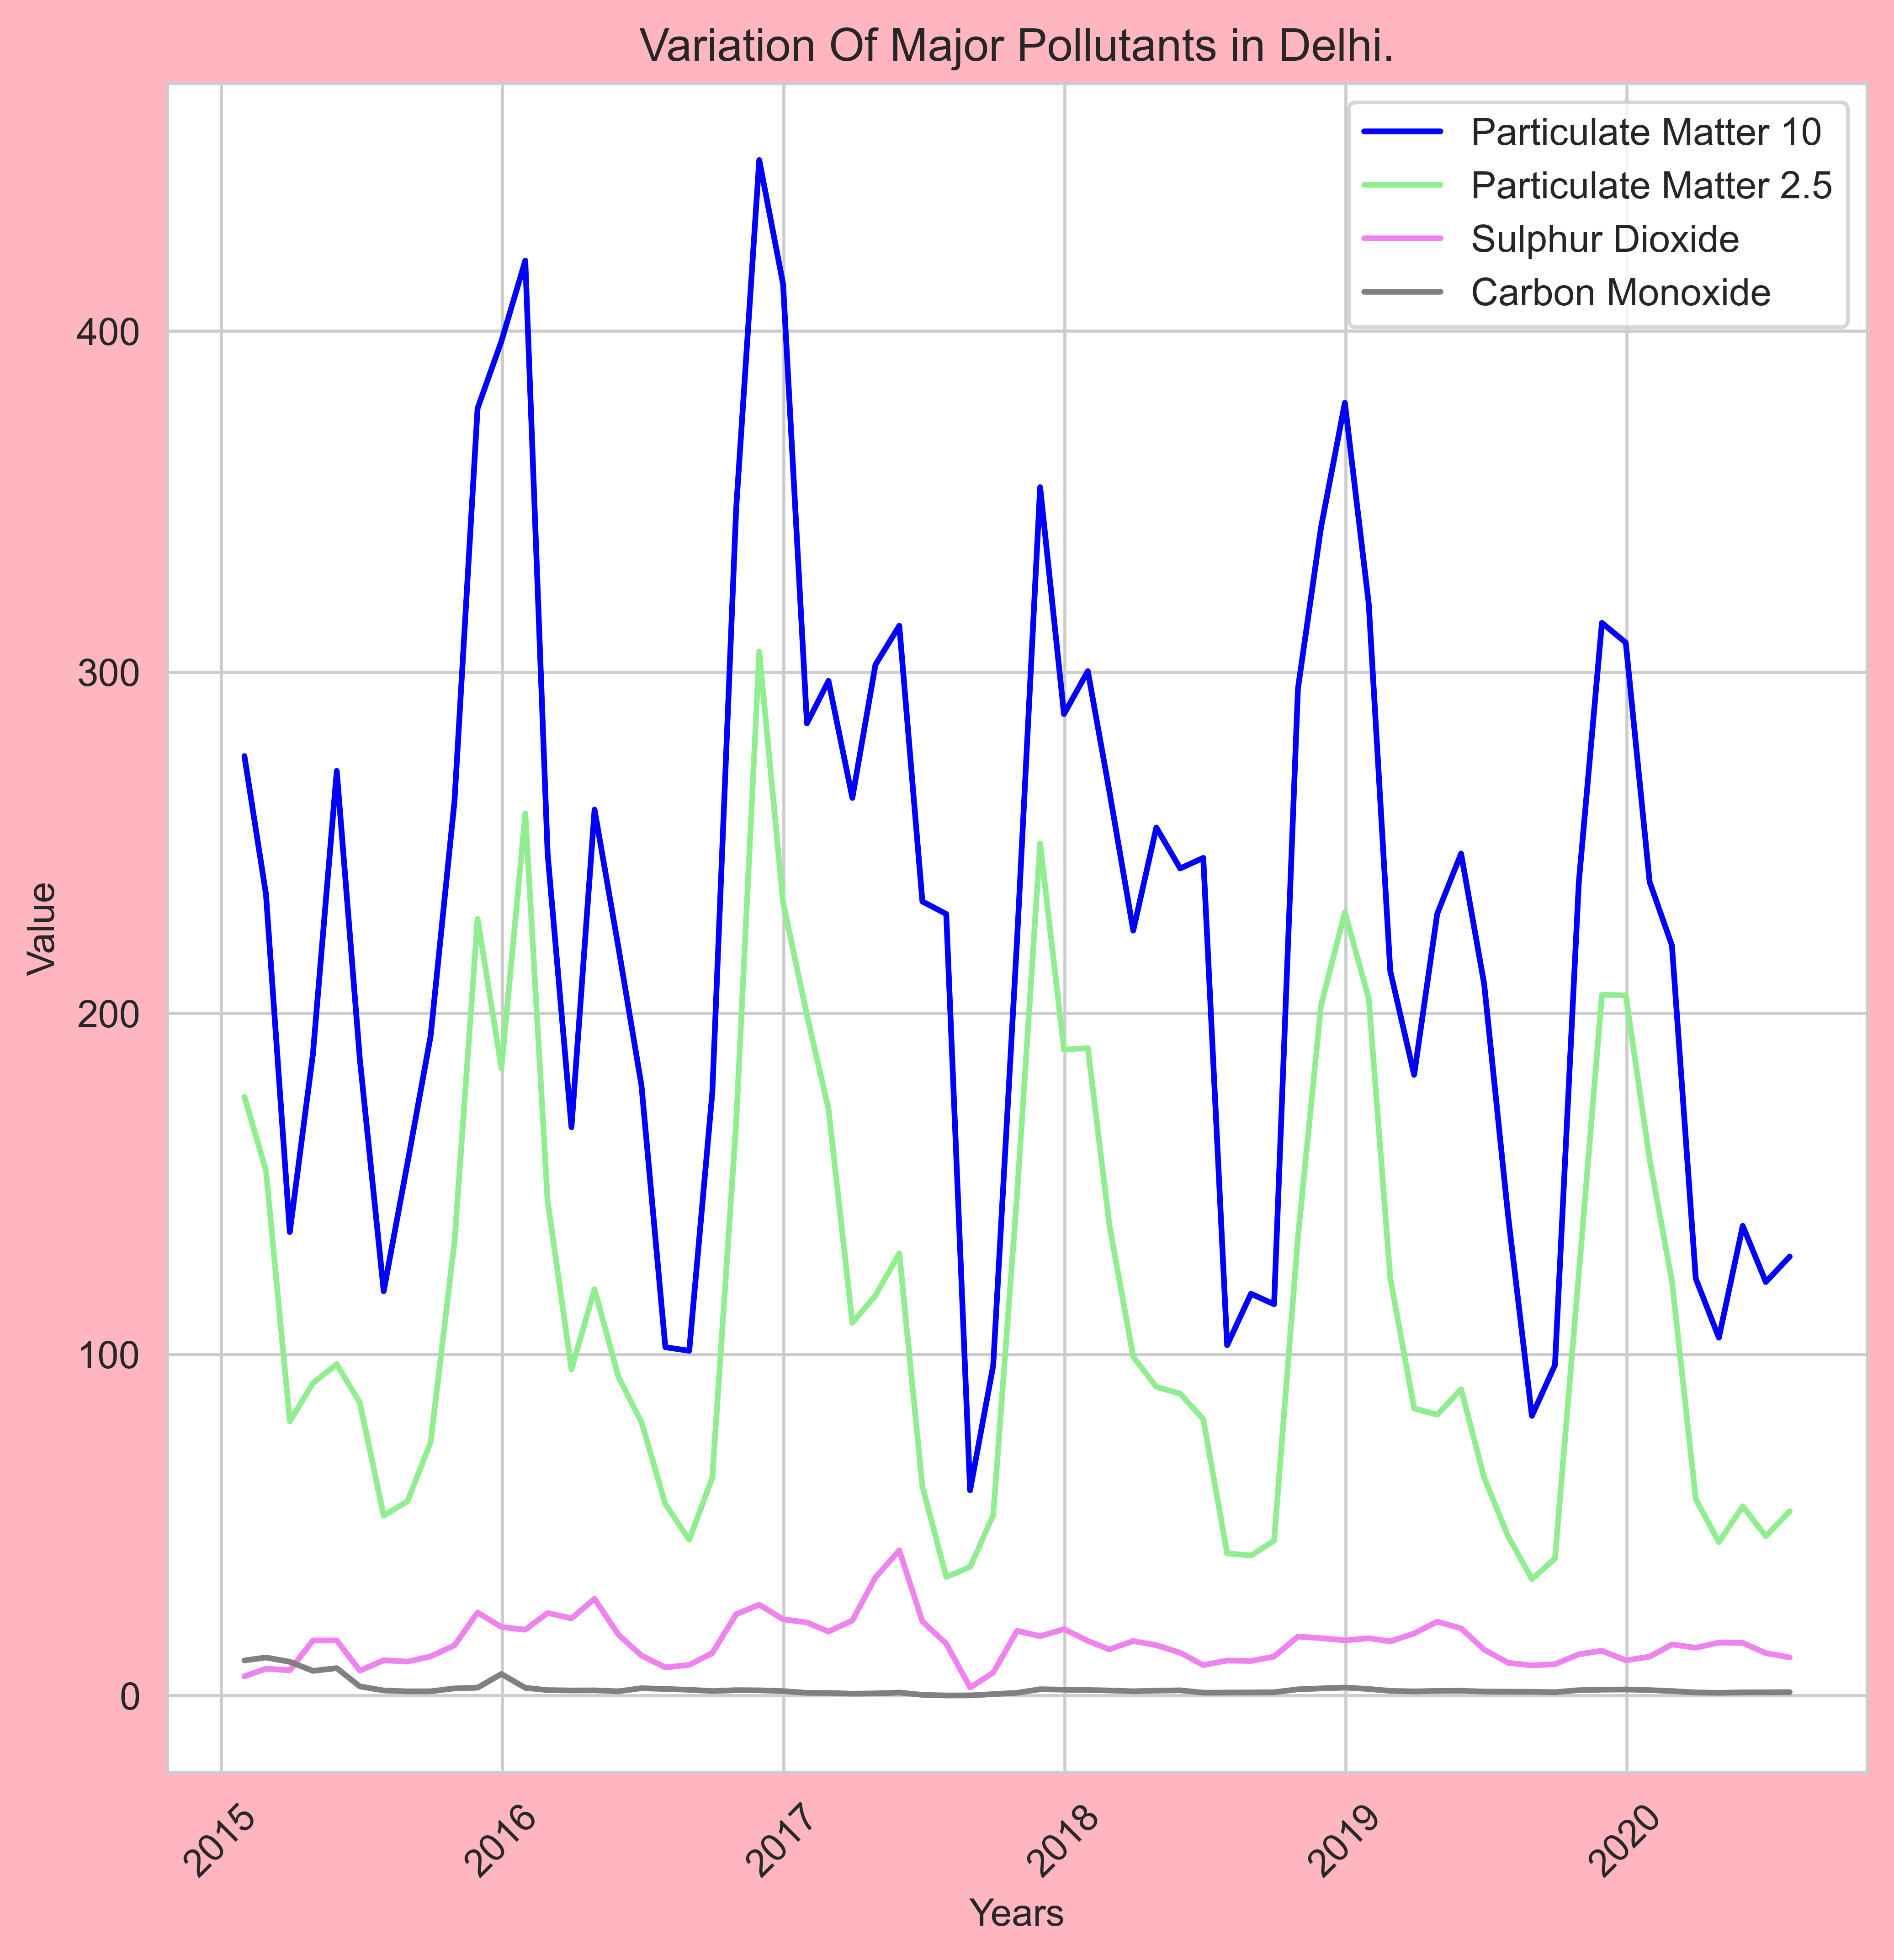

In [44]:
#LinePlot to show variations of PM10, PM2.5, SO and CO in Delhi over the years.
plt.figure(figsize=(8, 8), dpi=600, facecolor='lightpink')
plt.title('Variation Of Major Pollutants in Delhi.')
plt.plot(delhiMonth['PM10'], color='blue', label='Particulate Matter 10')
plt.plot(delhiMonth['PM2.5'], color='lightgreen', label='Particulate Matter 2.5')
plt.plot(delhiMonth['SO2'].fillna(delhiMonth['SO2'].median()), color='violet', label='Sulphur Dioxide')
plt.plot(delhiMonth['CO'], color='grey', label='Carbon Monoxide')
plt.xlabel('Years')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [45]:
total = len(delhiDay['AQI_Bucket'])
delhiBucket = delhiDay['AQI_Bucket'].fillna(delhiDay['AQI_Bucket'].mode()[0]).value_counts()

In [46]:
bucketPct = round(delhiBucket / total, 3)

In [47]:
bucketNames = delhiBucket.index
print(bucketNames)

Index(['Very Poor', 'Poor', 'Moderate', 'Severe', 'Satisfactory', 'Good'], dtype='object')


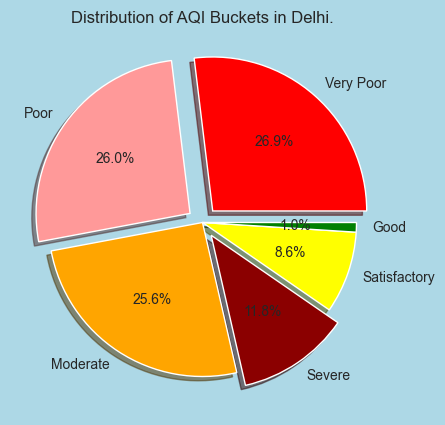

In [48]:
#Pie Chart for Distribution of AQI_Buckets.
colorss = ['#FF0000', '#FF9999', 'orange', '#8B0000', 'yellow', 'green']
plt.figure(figsize=(5, 5), facecolor='lightblue')
plt.title('Distribution of AQI Buckets in Delhi.')
plt.pie(bucketPct, labels=bucketNames, colors=colorss, explode=[0.1, 0.1, 0, 0.1, 0, 0], shadow=True, autopct='%1.1f%%')
plt.show()

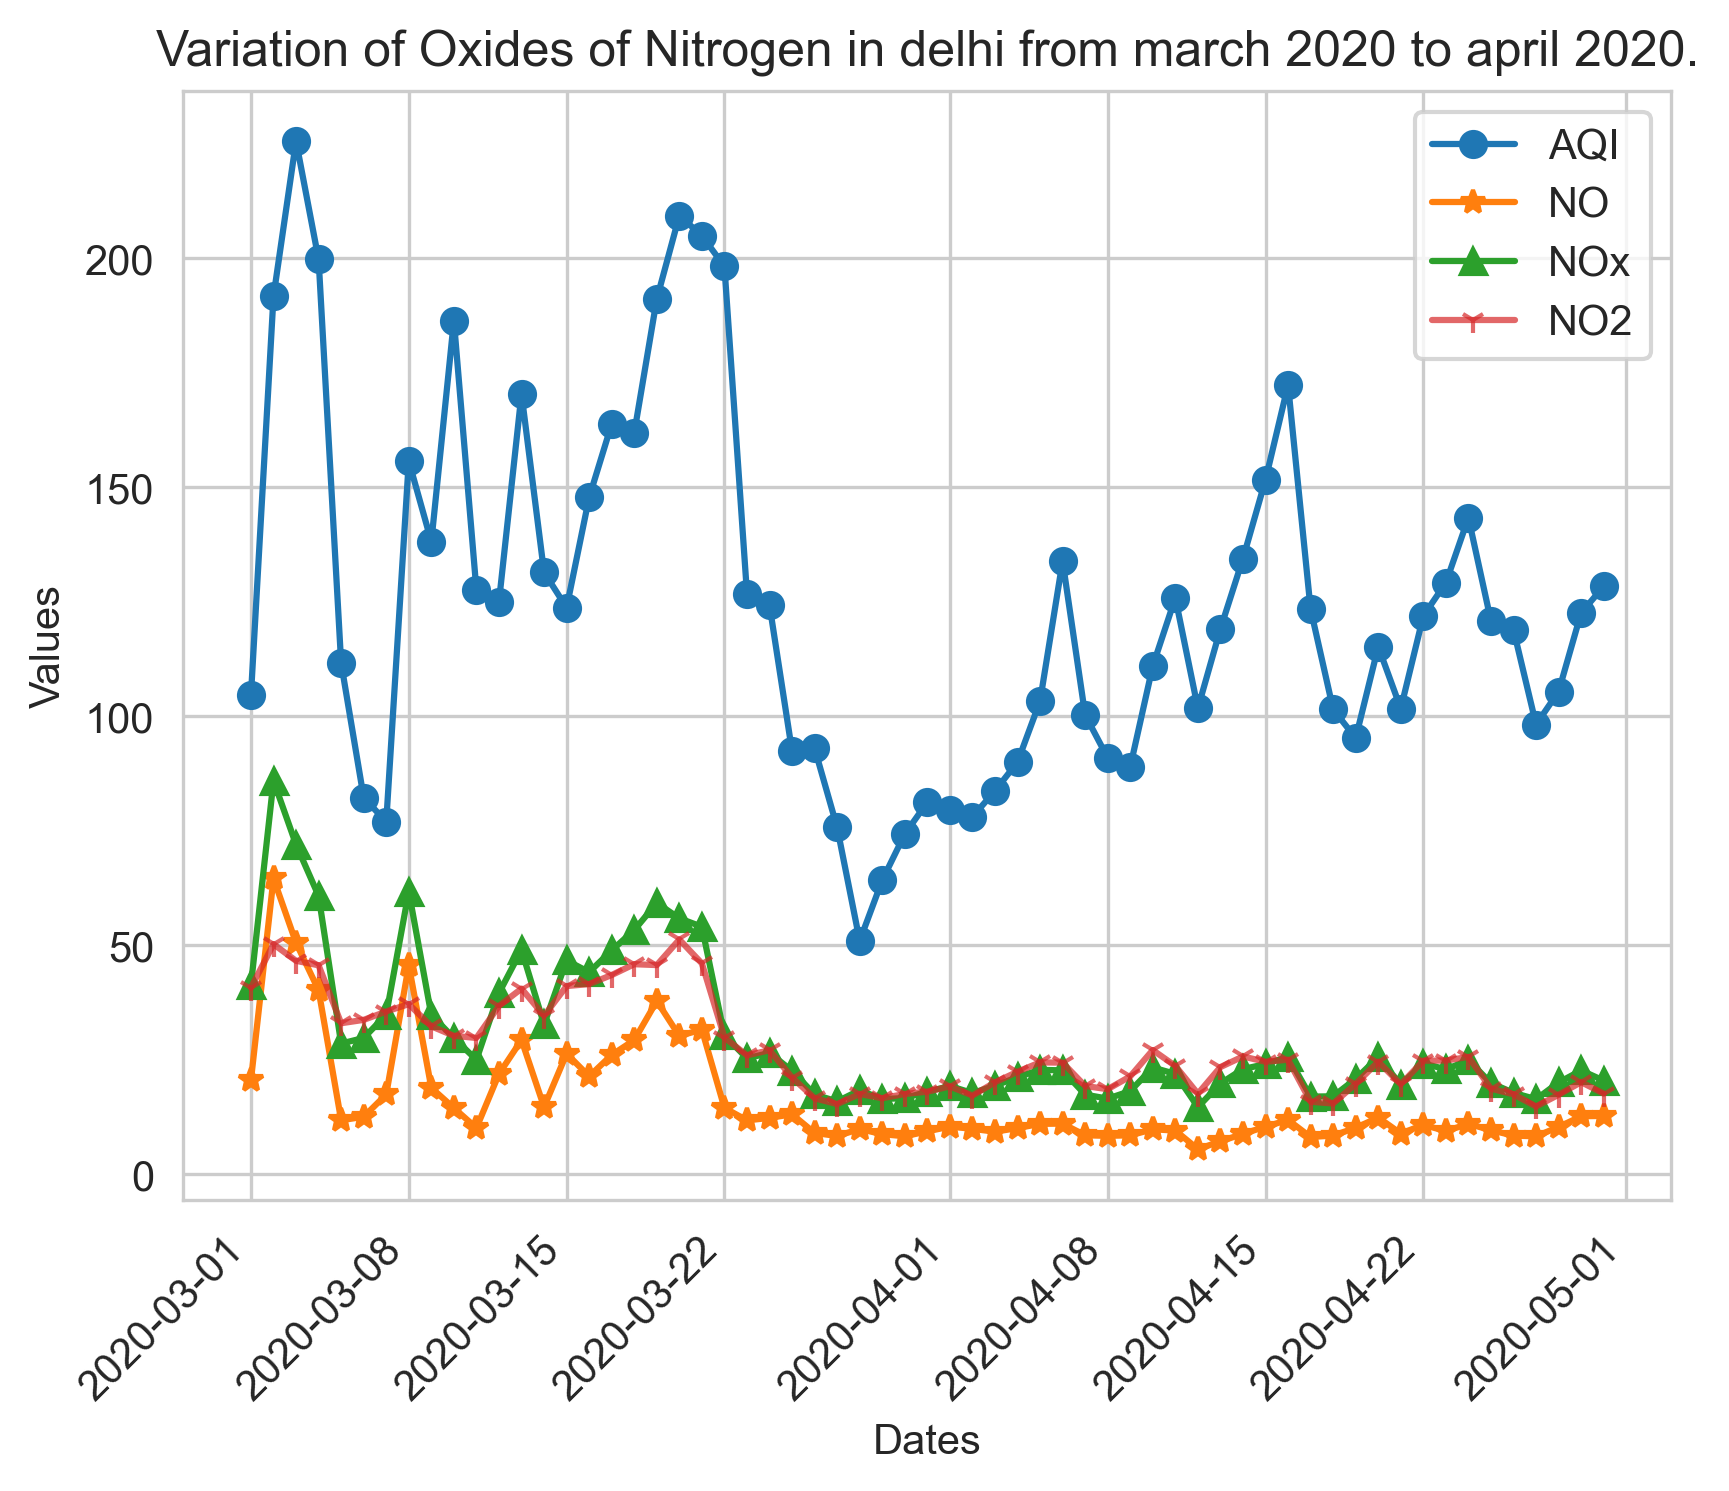

In [49]:
#LinePlot to show variation of Oxides of Nitrogen in Delhi from march 2020 to april 2020.
plt.figure(dpi=300)
plt.title('Variation of Oxides of Nitrogen in delhi from march 2020 to april 2020.')
plt.plot(delhiDay.loc['2020-03':'2020-04']['AQI'], label='AQI', marker='o')
plt.plot(delhiDay.loc['2020-03':'2020-04']['NO'], label='NO', marker='*')
plt.plot(delhiDay.loc['2020-03':'2020-04']['NOx'], label='NOx', marker='^')
plt.plot(delhiDay.loc['2020-03':'2020-04']['NO2'], label='NO2', marker='1', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Dates')
plt.ylabel('Values')
plt.legend()
plt.show()

<Axes: title={'center': 'Distribution of AQI in Delhi'}, xlabel='AQI', ylabel='Count'>

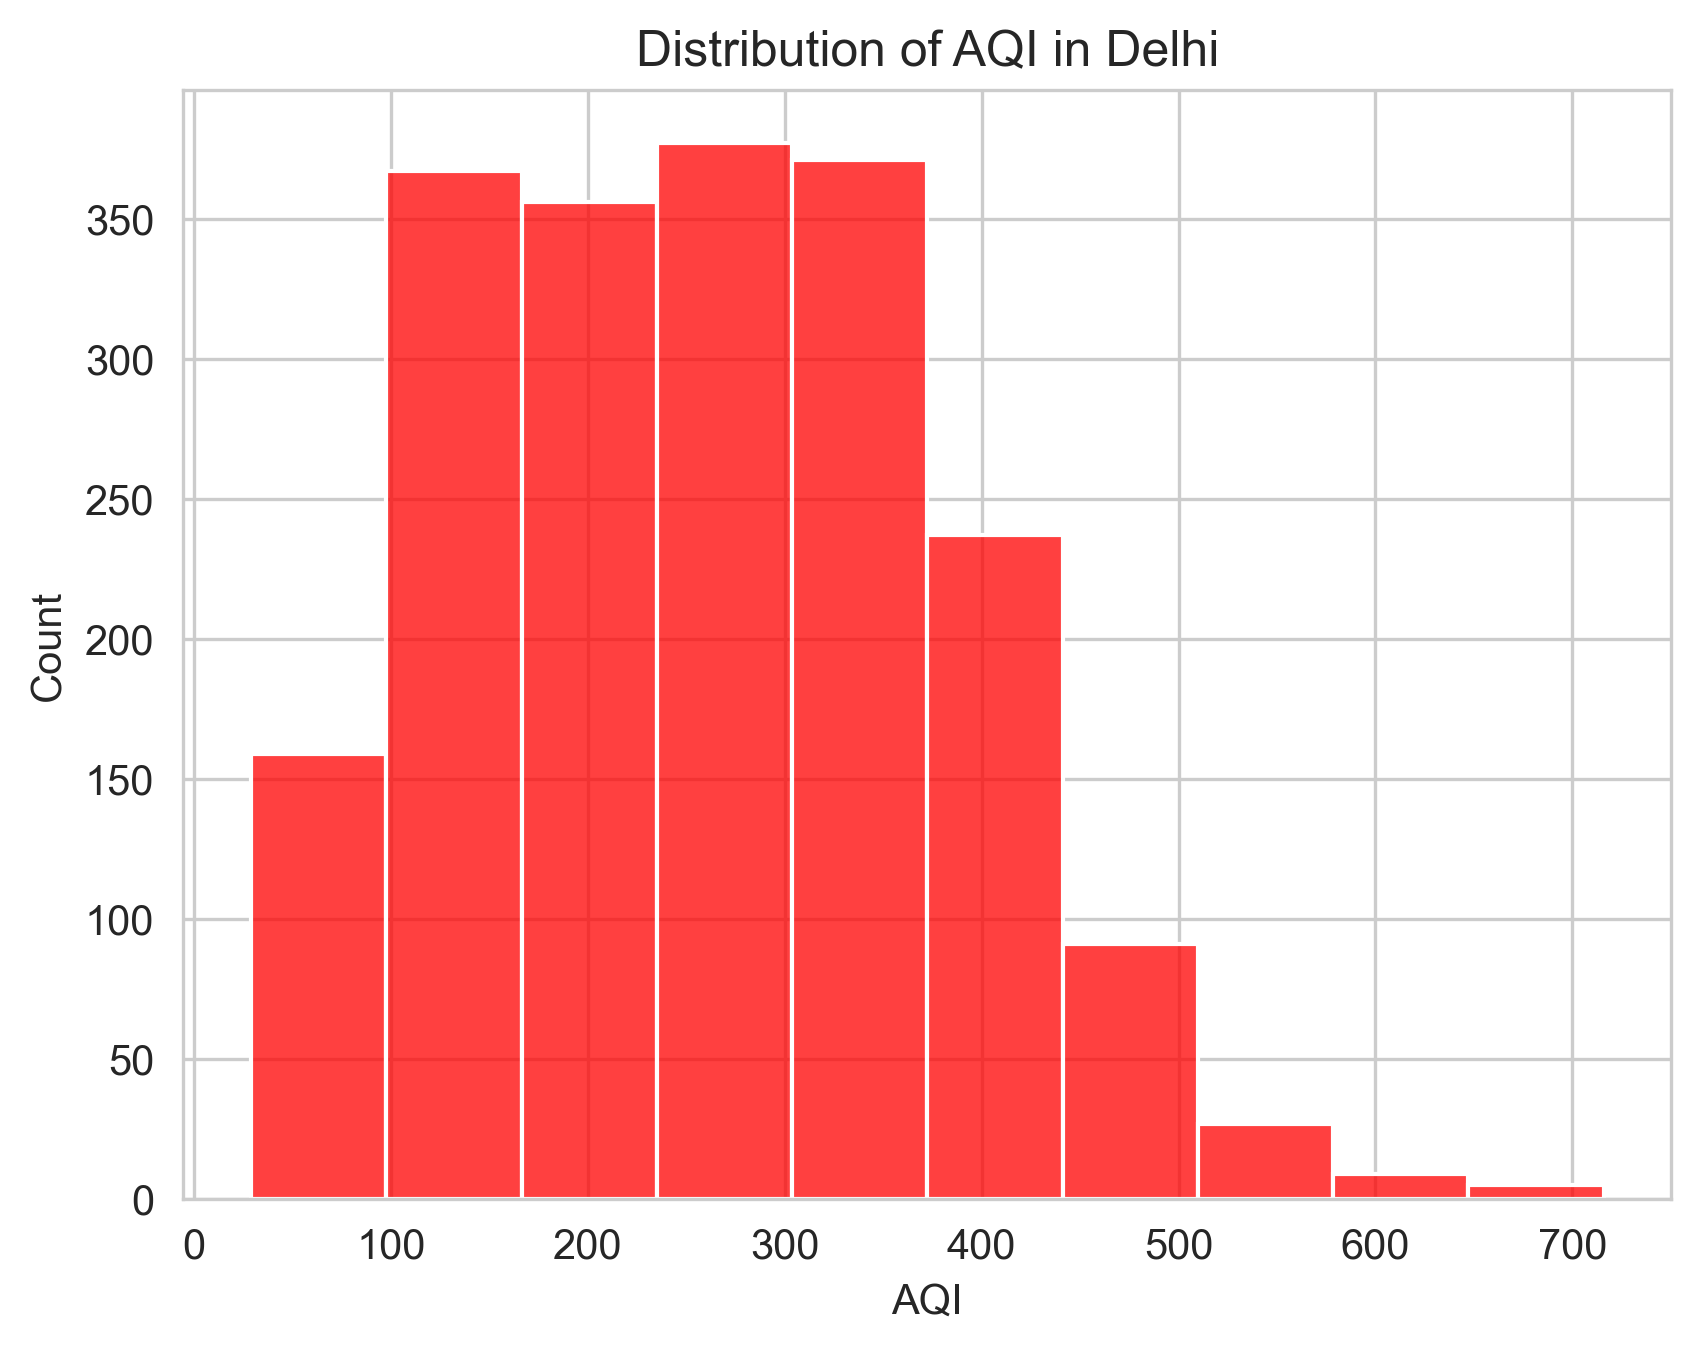

In [50]:
#Histogram to show distribution of AQI in Delhi.
plt.figure(dpi=300)
plt.title('Distribution of AQI in Delhi')
sns.histplot(delhiDay['AQI'], bins=10, color='red')

<Figure size 1920x1440 with 0 Axes>

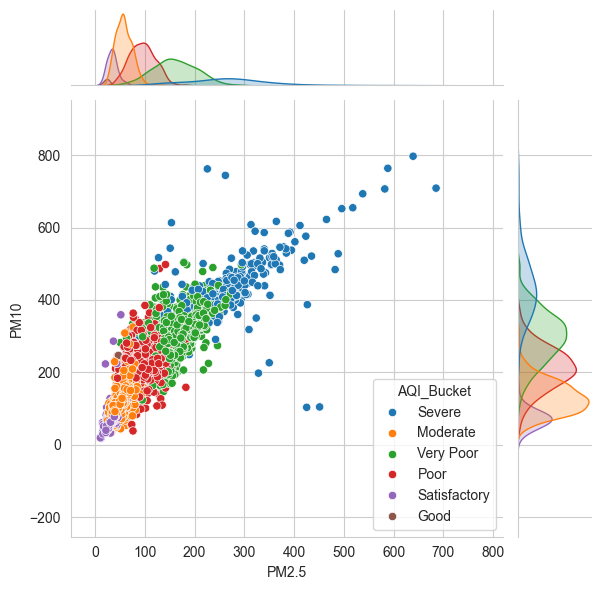

In [51]:
#JointPlot to show relationship between PM2.5 and PM10 in Delhi.
plt.figure(dpi=300)
sns.jointplot(x=delhiDay['PM2.5'], y=delhiDay['PM10'], hue=delhiDay['AQI_Bucket'])